<div style="background-color:#e6f5e6;">
<br/>
<div style="text-align:center;">
  <img src="retail_gif.gif" alt="Retail Analytics" style="height:300px; width:400px;">
</div>
<div style="text-align:center; color:black;">
<h2>Capstone Project 7</h2>
<h3>Retail Analytics</h3>
</div><br/>
</div>
<hr/>

### BY GROUP 15 :
| Name               | Registration_Id|
|--------------------|----------------|
| SANJEEP ROUT       | 2041018144     |
| JEET ACHARYA       | 2041001009     |
| PALAK AGARWAL      | 2041001024     |
| AMRUTTA DHAL       | 2041004146     |
| PRIYAJIT GANTAYAT  | 2041007003     |
| RISHU KUMAR        | 2041011066     |

### Details

A retail company “ABC Private Limited” wants to understand the customer purchase
behaviour (specifically, purchase amount) against various products of different categories.
They have shared purchase summary of various customers for selected high-volume products
from last month.

In [1]:
# manipulation data
import pandas as pd
import numpy as np

#visualiation data
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import plotly.express as px
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#default theme
plt.style.use('ggplot')
sns.set(context='notebook', style='darkgrid', palette='colorblind', font='sans-serif', font_scale=1, rc=None)
plt.rcParams['figure.figsize'] =[10,6]
plt.rcParams.update({'font.size': 15})
plt.rcParams['font.family'] = 'sans-serif'
# from google.colab import drive
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

## LOAD THE DATASET

In [2]:
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
# files imports
# a. Load the dataset
user_demographics = r"P:\0011 NOTES\aii+ml-comviva\Capstone_Project_7\user_demographics.csv"
user_purchase_details = r"P:\0011 NOTES\aii+ml-comviva\Capstone_Project_7\User_product_purchase_details_p2.csv"

In [4]:
# data details
df1 = pd.read_csv(user_demographics)
df2 = pd.read_csv(user_purchase_details)

## DATA EXPLORATION

### * user_demographics data and user_product_purchase_details

In [5]:
df1


,User_ID,Gender,Age,Occupation
0,1000001,F,0-17,10
1,1000002,M,55+,16
2,1000003,M,26-35,15
3,1000004,M,46-50,7
4,1000005,M,26-35,20
...,...,...,...,...
5886,1004588,F,26-35,4
5887,1004871,M,18-25,12
5888,1004113,M,36-45,17
5889,1005391,M,26-35,7


In [6]:
df2

,User_ID,Product_ID,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,C,2,0,20,NaN,NaN,365


In [7]:
print(df1.groupby('User_ID').size())
print('\n\n')
print(df2.groupby('User_ID').size())


User_ID
1000001    1
1000002    1
1000003    1
1000004    1
1000005    1
          ..
1006036    1
1006037    1
1006038    1
1006039    1
1006040    1
Length: 5891, dtype: int64



User_ID
1000001     35
1000002     77
1000003     29
1000004     14
1000005    106
          ... 
1006036    514
1006037    122
1006038     12
1006039     74
1006040    180
Length: 5891, dtype: int64


In [8]:
print(df1.info())
print('\n\n')
print(df2.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   User_ID     5891 non-null   int64 
 1   Gender      5891 non-null   object
 2   Age         5891 non-null   object
 3   Occupation  5891 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 184.2+ KB
None



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   City_Category               550068 non-null  object 
 3   Stay_In_Current_City_Years  550068 non-null  object 
 4   Marital_Status              550068 non-null  int64  
 5   Product_Category_1          550068 non-null  int64  
 6   Product_Categor

In [9]:
print(df1.describe())
print('\n\n')
print(df2.describe())


            User_ID   Occupation
count  5.891000e+03  5891.000000
mean   1.003025e+06     8.153285
std    1.743379e+03     6.323140
min    1.000001e+06     0.000000
25%    1.001518e+06     3.000000
50%    1.003026e+06     7.000000
75%    1.004532e+06    14.000000
max    1.006040e+06    20.000000



            User_ID  Marital_Status  Product_Category_1  Product_Category_2  \
count  5.500680e+05   550068.000000       550068.000000       376430.000000   
mean   1.003029e+06        0.409653            5.404270            9.842329   
std    1.727592e+03        0.491770            3.936211            5.086590   
min    1.000001e+06        0.000000            1.000000            2.000000   
25%    1.001516e+06        0.000000            1.000000            5.000000   
50%    1.003077e+06        0.000000            5.000000            9.000000   
75%    1.004478e+06        1.000000            8.000000           15.000000   
max    1.006040e+06        1.000000           20.000000           18

In [10]:
print(df1.shape)
print(df2.shape)

(5891, 4)
(550068, 9)


In [11]:
# unique entries
print('user demographics- \n')
for column_name in df1.columns:
    unique_entries_count = df1[column_name].nunique()
    print(f"Number of unique entries in '{column_name}': {unique_entries_count}")
print('\n\n')
print('user purchase details - \n')
for column_name in df2.columns:
    unique_entries_count = df2[column_name].nunique()
    print(f"Number of unique entries in '{column_name}': {unique_entries_count}")

user demographics- 

Number of unique entries in 'User_ID': 5891
Number of unique entries in 'Gender': 2
Number of unique entries in 'Age': 7
Number of unique entries in 'Occupation': 21



user purchase details - 

Number of unique entries in 'User_ID': 5891
Number of unique entries in 'Product_ID': 3631
Number of unique entries in 'City_Category': 3
Number of unique entries in 'Stay_In_Current_City_Years': 5
Number of unique entries in 'Marital_Status': 2
Number of unique entries in 'Product_Category_1': 20
Number of unique entries in 'Product_Category_2': 17
Number of unique entries in 'Product_Category_3': 15
Number of unique entries in 'Purchase': 18105


In [12]:
# missing values in data
print('user demographics- \n', df1.isnull().sum())
print('\n\n')
print('user purchase details - \n', df2.isnull().sum())

user demographics- 
 User_ID       0
Gender        0
Age           0
Occupation    0
dtype: int64



user purchase details - 
 User_ID                            0
Product_ID                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64


In [13]:
# duplicated values in data
print('user demographics- \n', df1[df1.duplicated()].sum())
print('\n\nuser purchase details - \n', df2[df2.duplicated()].sum())

user demographics- 
 User_ID       0.0
Gender        0.0
Age           0.0
Occupation    0.0
dtype: float64


user purchase details - 
 User_ID                       0.0
Product_ID                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category_1            0.0
Product_Category_2            0.0
Product_Category_3            0.0
Purchase                      0.0
dtype: float64


### MERGE THE DATASET


In [14]:
new_df= pd.merge(df1, df2, on= "User_ID", how= "right")
new_df

,User_ID,Gender,Age,Occupation,Product_ID,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,F,0-17,10,P00069042,A,2,0,3,NaN,NaN,8370
1,1000001,F,0-17,10,P00248942,A,2,0,1,6.0,14.0,15200
2,1000001,F,0-17,10,P00087842,A,2,0,12,NaN,NaN,1422
3,1000001,F,0-17,10,P00085442,A,2,0,12,14.0,NaN,1057
4,1000002,M,55+,16,P00285442,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,M,51-55,13,P00372445,B,1,1,20,NaN,NaN,368
550064,1006035,F,26-35,1,P00375436,C,3,0,20,NaN,NaN,371
550065,1006036,F,26-35,15,P00375436,B,4+,1,20,NaN,NaN,137
550066,1006038,F,55+,1,P00375436,C,2,0,20,NaN,NaN,365


In [15]:
# make the data set more user friendly by replacing with useful names
new_df.columns = new_df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
new_df

,user_id,gender,age,occupation,product_id,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1000001,F,0-17,10,P00069042,A,2,0,3,NaN,NaN,8370
1,1000001,F,0-17,10,P00248942,A,2,0,1,6.0,14.0,15200
2,1000001,F,0-17,10,P00087842,A,2,0,12,NaN,NaN,1422
3,1000001,F,0-17,10,P00085442,A,2,0,12,14.0,NaN,1057
4,1000002,M,55+,16,P00285442,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,M,51-55,13,P00372445,B,1,1,20,NaN,NaN,368
550064,1006035,F,26-35,1,P00375436,C,3,0,20,NaN,NaN,371
550065,1006036,F,26-35,15,P00375436,B,4+,1,20,NaN,NaN,137
550066,1006038,F,55+,1,P00375436,C,2,0,20,NaN,NaN,365


In [16]:
new_df.describe(include='all')

,user_id,gender,age,occupation,product_id,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
count,5.500680e+05,550068,550068,550068.000000,550068,550068,550068,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
unique,NaN,2,7,NaN,3631,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,M,26-35,NaN,P00265242,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,414259,219587,NaN,1880,231173,193821,NaN,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,8.076707,NaN,NaN,NaN,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,NaN,NaN,6.522660,NaN,NaN,NaN,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,NaN,NaN,2.000000,NaN,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,NaN,NaN,7.000000,NaN,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,NaN,NaN,14.000000,NaN,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12054.000000


In [17]:
new_df.describe(include="object")

,gender,age,product_id,city_category,stay_in_current_city_years
count,550068,550068,550068,550068,550068
unique,2,7,3631,3,5
top,M,26-35,P00265242,B,1
freq,414259,219587,1880,231173,193821


### ABOUT THE DATASET


* User_ID: A distinct ID is given to the customers to identify them uniquely.
* Product_ID: A distinct ID is given to products to identify them uniquely.
* Gender: M or F can be used as a binary variable.
* Age: Age is given in bins with 6 categories.
* Occupation: The type of occupation a user does, it is already masked.
* City_Category: The category of the city out of A, B, C. Should be used as Categorical Variable.
* Stay_In_Current_City_Years: It has 5 values: 0, 1, 2, 3, 4+ and may be used as categorical variables.
* Marital_Status: 0: Unmarried and 1: Married. It is expected that marital status does affect the Purchase value.
* Product_Category_1: The primary category that a product belongs to. It can be a useful feature as some certain category of products are sold more often than others.
* Product_Category_2: The Secondary category of a product. If there is no secondary category this will be Null.
* Product_Category_3: The Tertiary Category of a product. This will be only occupied when Category 1 and 2 are occupied. Also, if a product does not have a tertiary category, it will be Null.
* Purchase: This is the target variable.

| Variable                  | Definition                                        |
|---------------------------|---------------------------------------------------|
| User_ID                   | User ID                                           |
| Product_ID                | Product ID                                        |
| Gender                    | Sex of User                                       |
| Age                       | Age in bins                                       |
| Occupation                | Occupation (Masked)                               |
| City_Category             | Category of the City (A,B,C)                      |
| Stay_In_Current_City_Years | Number of years stay in the current city         |
| Marital_Status            | Marital Status                                    |
| Product_Category_1        | Product Category (Masked)                         |
| Product_Category_2        | Product may belong to another category also   (Masked)                                          |
| Product_Category_3        | Product may belong to another category also   (Masked)                                          |
| Purchase                  | Purchase Amount (Target Variable)                 |








### Univariate analysis

Skew of Purchase column is: 0.6001400037087128
Kurtosis of Purchase column is: -0.338378


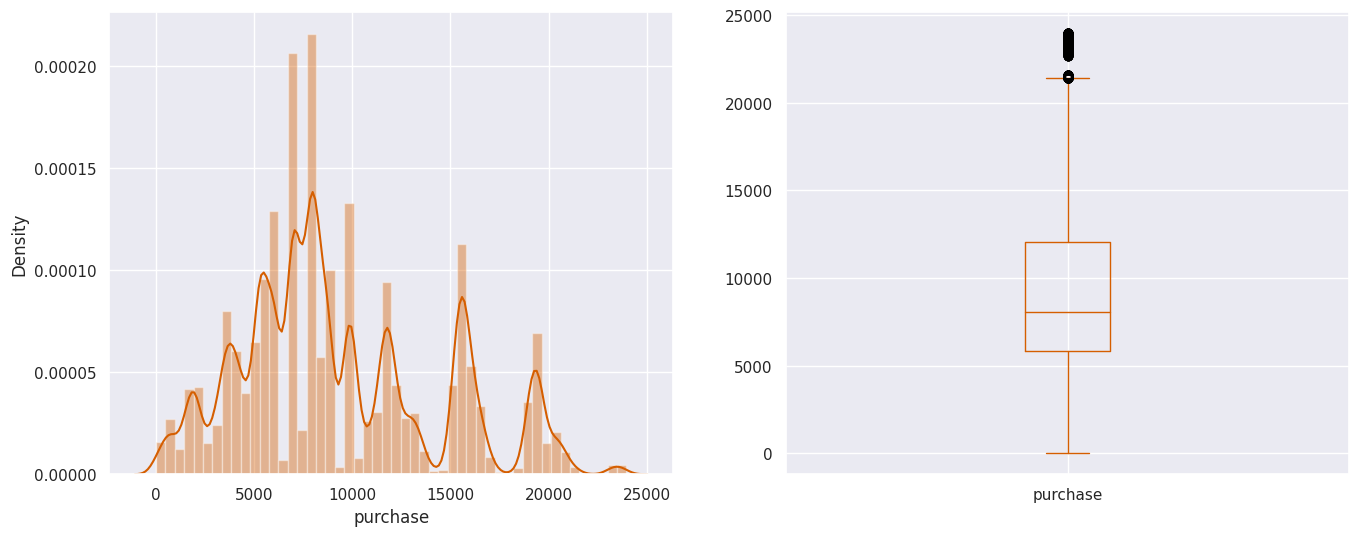

In [18]:
# visualizes the distribution of purchase amounts and provides an idea of how the data is spread
print ("Skew of Purchase column is:", new_df['purchase'].skew())
print("Kurtosis of Purchase column is: %f" % new_df['purchase'].kurt())
plt.figure(1)
plt.subplot(121)
sns.distplot(new_df["purchase"], color='r')

plt.subplot(122)
# shows the distribution of the data's median, quartiles, and outliers, giving insights into the data's central tendency and variability
new_df["purchase"].plot.box(figsize = (16, 6), color='r')
plt.show()

Counts - 
 M    414259
F    135809
Name: gender, dtype: int64

Percentage - 
 M    75.310507
F    24.689493
Name: gender, dtype: float64


([<matplotlib.patches.Wedge at 0x7ee938aeeef0>,
 [Text(-0.785367774085001, 0.7701931312526561, 'Male'),
  Text(0.8567647657901591, -0.840210768855371, 'Female')],
 [Text(-0.42838242222818235, 0.42010534431963054, '75.31%'),
  Text(0.49977944671092617, -0.49012294849896637, '24.69%')])

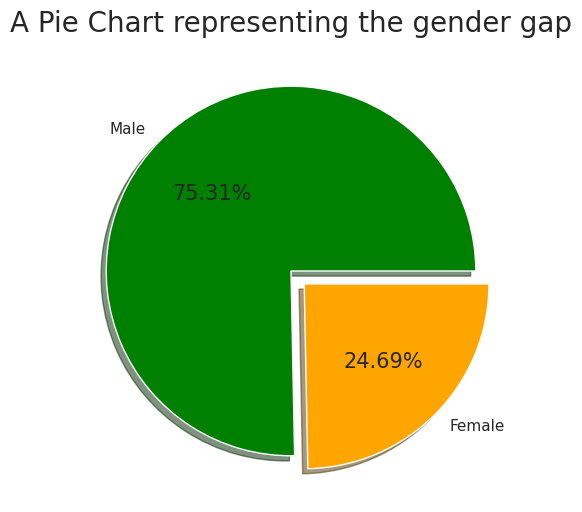

In [19]:
# to vizualize gender ratio and gain insights
labels = ['Male', 'Female']
colors = ['Green', 'Orange']
explode = [0, 0.1]
print("Counts - \n", new_df["gender"].value_counts())
print("\nPercentage - \n", new_df['gender'].value_counts(normalize=True)*100)
plt.title('A Pie Chart representing the gender gap', fontsize = 20)
plt.pie(new_df['gender'].value_counts(), colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')

<Axes: title={'center': 'Mean Purchase of Different Genders'}, xlabel='gender', ylabel='purchase'>

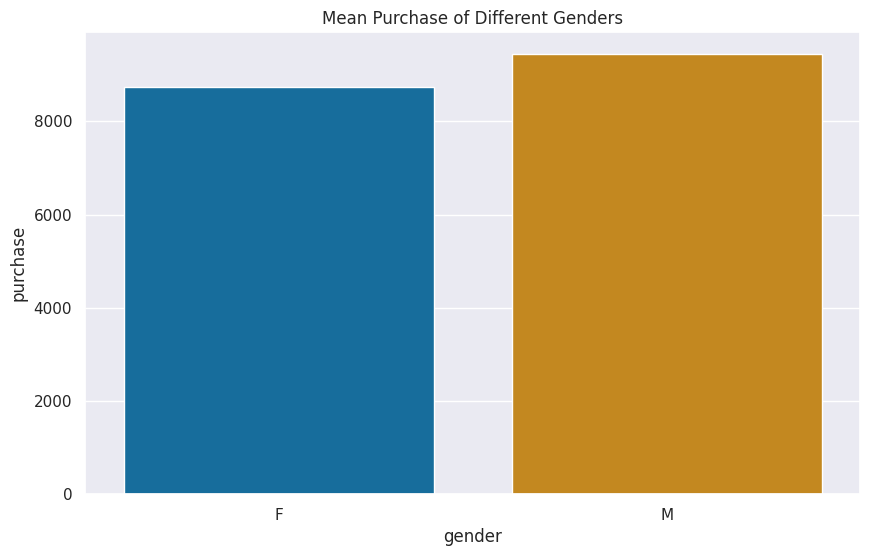

In [20]:
gender_plot = new_df.pivot_table(index='gender', values='purchase', aggfunc='mean')
plt.title("Mean Purchase of Different Genders")
sns.barplot(x=gender_plot.index, y='purchase', data=gender_plot)

In [24]:
new_df2 = new_df.copy()

In [25]:
def map_gender(df):
    df['gender'] = df['gender'].map({'F': 0, 'M': 1})

def map_age(df):
    age_mapping = {'0-17': 0, '18-25': 1, '26-35': 2, '36-45': 3, '46-50': 4, '51-55': 5, '55+': 6}
    df['age'] = df['age'].map(age_mapping)

def map_city_category(df):
    city_category_mapping = {'A': 0, 'B': 1, 'C': 2}
    df['city_category'] = df['city_category'].map(city_category_mapping)

def map_stay_in_current_city_years(df):
    stay_years_mapping = {'0': 0, '1': 1, '2': 2, '3': 3, '4+': 4}
    df['stay_in_current_city_years'] = df['stay_in_current_city_years'].map(stay_years_mapping)
def modify_user_id(df):
    df['user_id'] = df['user_id'] - 1000000
def modify_product_id(df):
    df['product_id'] = df['product_id'].str.replace('P00', '')
    df['product_id'] = pd.to_numeric(df['product_id'], errors='coerce')

## Applying the mappings

map_gender(new_df2)
map_age(new_df2)
map_city_category(new_df2)
map_stay_in_current_city_years(new_df2)
modify_user_id(new_df2)
modify_product_id(new_df2)
for col in new_df2.columns[:]:
    if new_df2[col].dtype == 'int64' and col:
        new_df2[col] = new_df2[col].astype('uint8')

new_df2

,user_id,gender,age,occupation,product_id,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1,0,0,10,178,0,2,0,3,NaN,NaN,178
1,1,0,0,10,110,0,2,0,1,6.0,14.0,96
2,1,0,0,10,34,0,2,0,12,NaN,NaN,142
3,1,0,0,10,194,0,2,0,12,14.0,NaN,33
4,2,1,6,16,2,2,4,0,8,NaN,NaN,33
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,145,1,5,13,221,1,1,1,20,NaN,NaN,112
550064,147,0,2,1,140,2,3,0,20,NaN,NaN,115
550065,148,0,2,15,140,1,4,1,20,NaN,NaN,137
550066,150,0,6,1,140,2,2,0,20,NaN,NaN,109


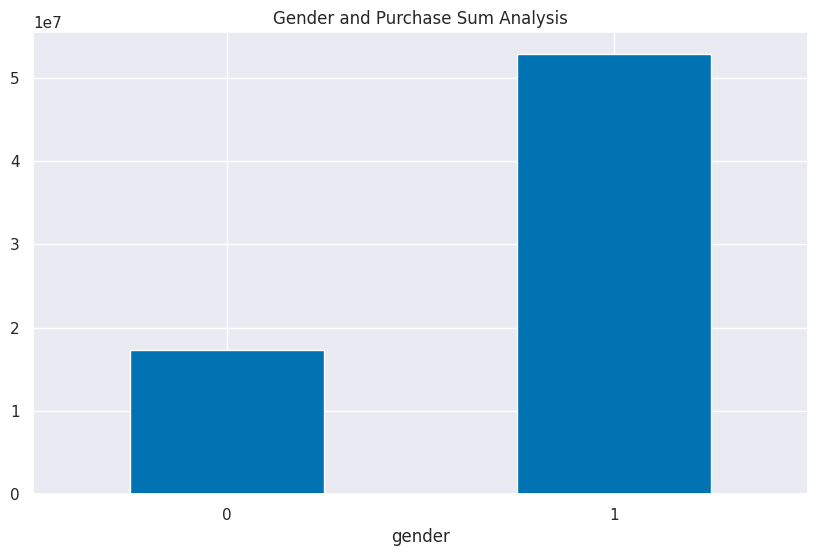

In [26]:
new_df2.groupby('gender').sum()['purchase'].plot(kind='bar')
plt.title("Gender and Purchase Sum Analysis")
plt.xticks(rotation=0)
plt.show()

In [27]:
# to visualize the no. of years with respect to the data
age=new_df['age'].value_counts()
print("Age counts- \n", age)
fig=px.bar(age, y=age, x=age.index, color=age.index, template='ggplot2')
fig.update_layout(
    title= 'Age Distribution',
    xaxis_title= 'Age',
    yaxis_title="Count",
    legend_title='Age',
)
fig.show()

Age counts- 
 26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: age, dtype: int64


Age counts- 
 26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: age, dtype: int64


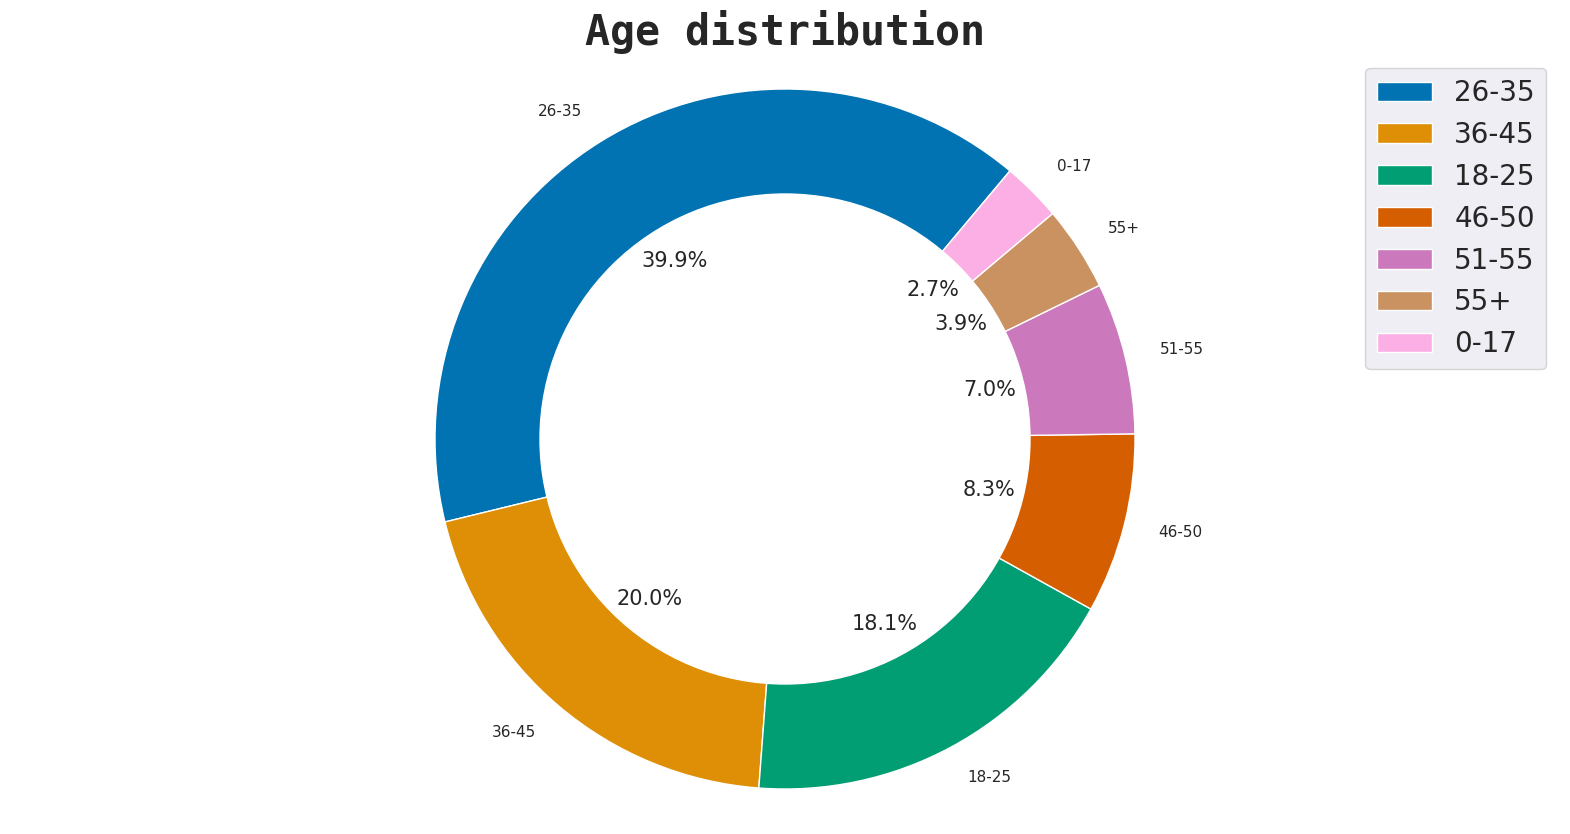

In [28]:
# Creating a donut chart for 'Age'
age = new_df['age'].value_counts()

print("Age counts- \n", age)
plt.figure(figsize = (20, 10))
plt.pie(age.values, labels = age.index, startangle = 50, autopct = '%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Age distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.axis('equal')
plt.legend(prop = {'size' : 20})
plt.show()

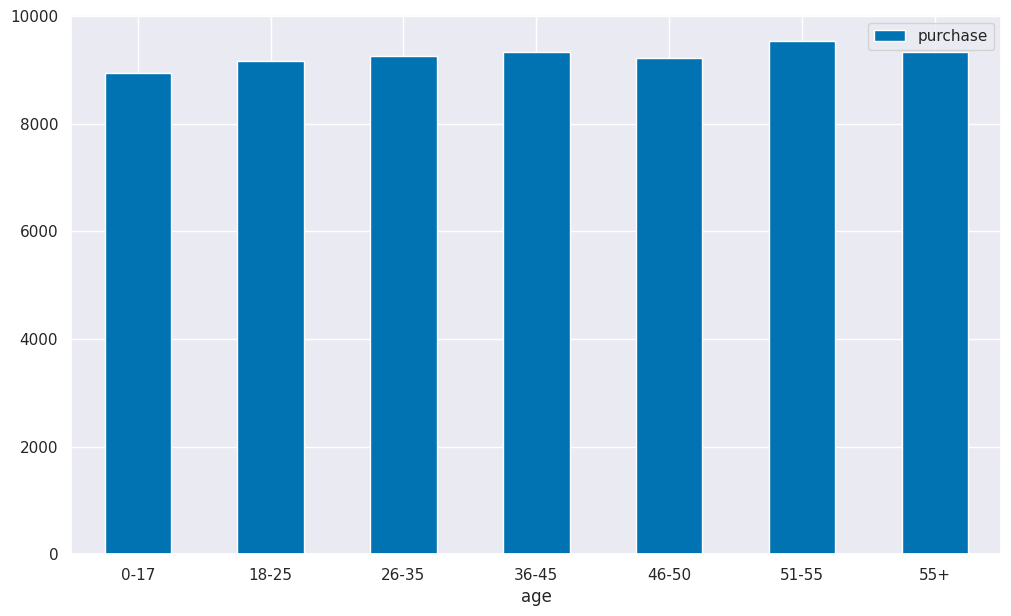

In [29]:
age_ = new_df.pivot_table(index='age', values="purchase", aggfunc=np.mean)
age_.plot(kind='bar',figsize=(12,7))
plt.xticks(rotation=0)
plt.show()

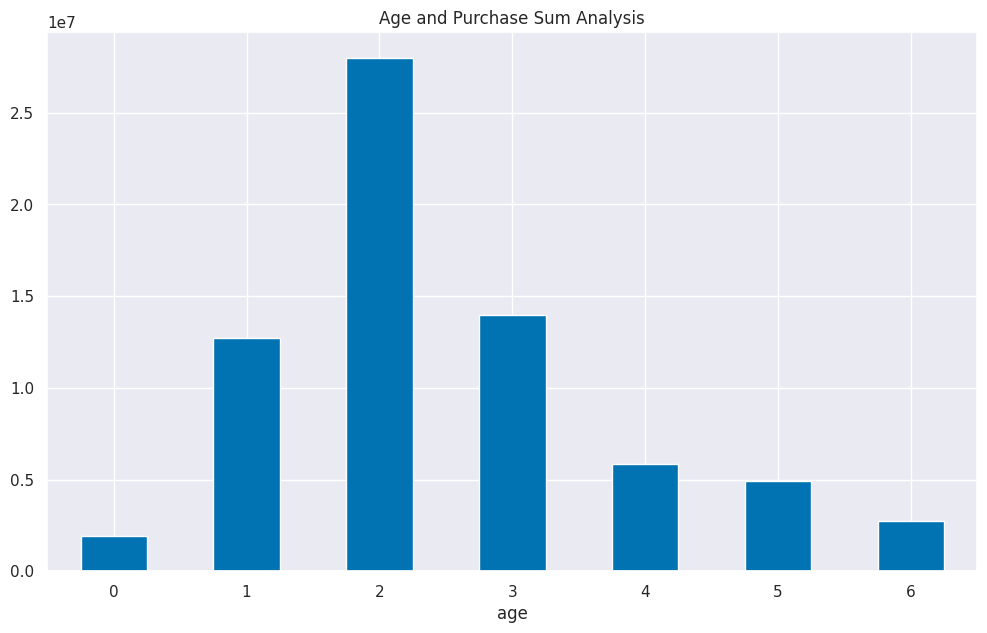

In [30]:
new_df2.groupby("age").sum()['purchase'].plot(kind="bar",figsize=(12,7))
plt.title("Age and Purchase Sum Analysis")
plt.xticks(rotation=0)
plt.show()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: stay_in_current_city_years, dtype: int64


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4+'),
  Text(4, 0, '0')])

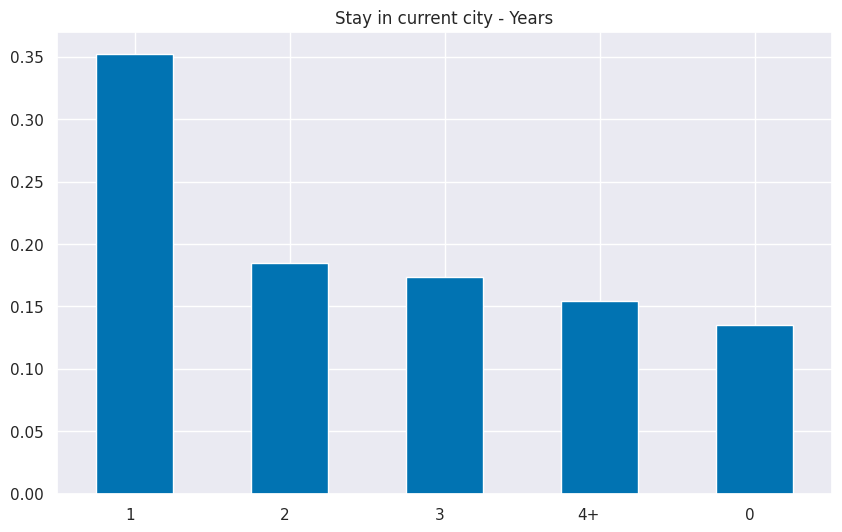

In [31]:
print(new_df["stay_in_current_city_years"].value_counts())
new_df['stay_in_current_city_years'].value_counts(normalize = True).plot.bar(title = 'Stay in current city - Years')
plt.xticks(rotation=0, ha='right')

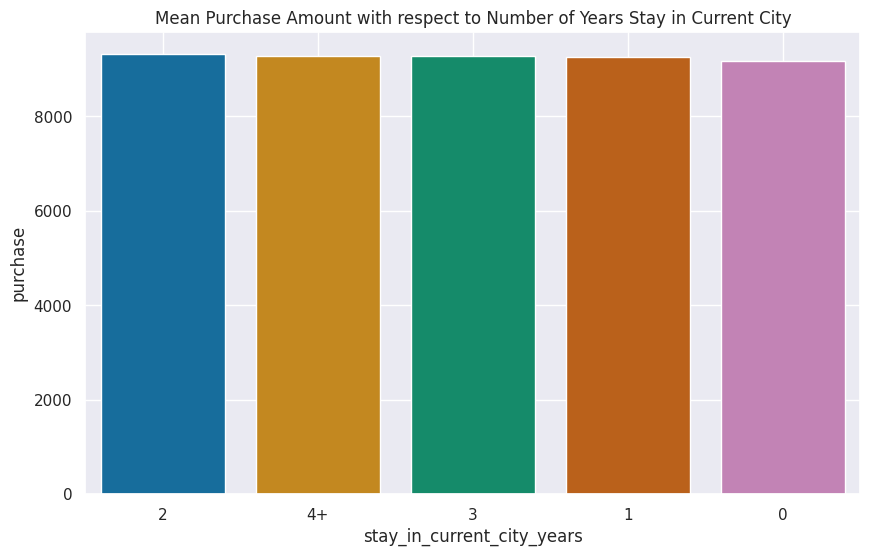

In [32]:
sns.barplot(x='stay_in_current_city_years', y='purchase', data=new_df, ci=None)
plt.title("Mean Purchase Amount with respect to Number of Years Stay in Current City")
plt.grid(1)
plt.show()

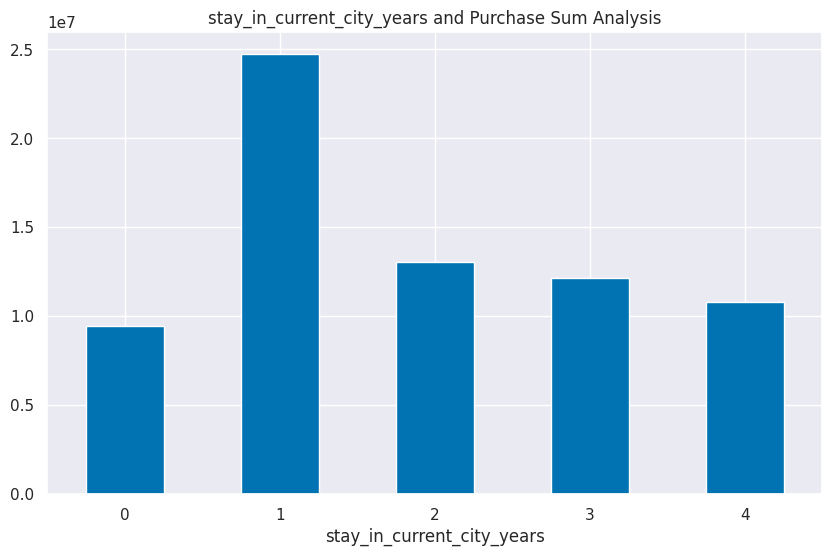

In [33]:
new_df2.groupby('stay_in_current_city_years').sum()['purchase'].plot(kind='bar')
plt.title("stay_in_current_city_years and Purchase Sum Analysis")
plt.xticks(rotation=0)
plt.show()

city_category
A    147720
B    231173
C    171175
dtype: int64


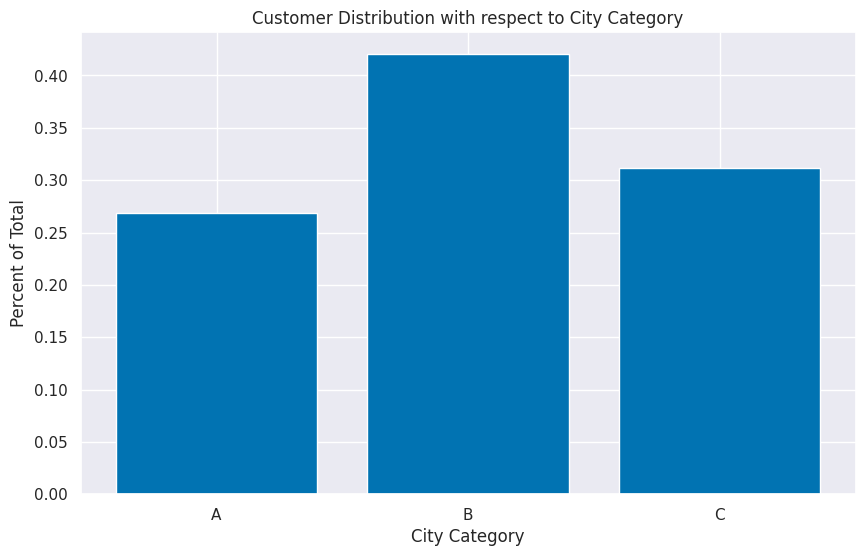

In [34]:
# to visualize the city category with the total data
print(new_df.groupby('city_category').size())
city_category_percent = new_df['city_category'].value_counts(normalize=True).sort_index()
plt.bar(city_category_percent.index, city_category_percent)
plt.title("Customer Distribution with respect to City Category")
plt.xlabel("City Category")
plt.ylabel("Percent of Total")
plt.show()

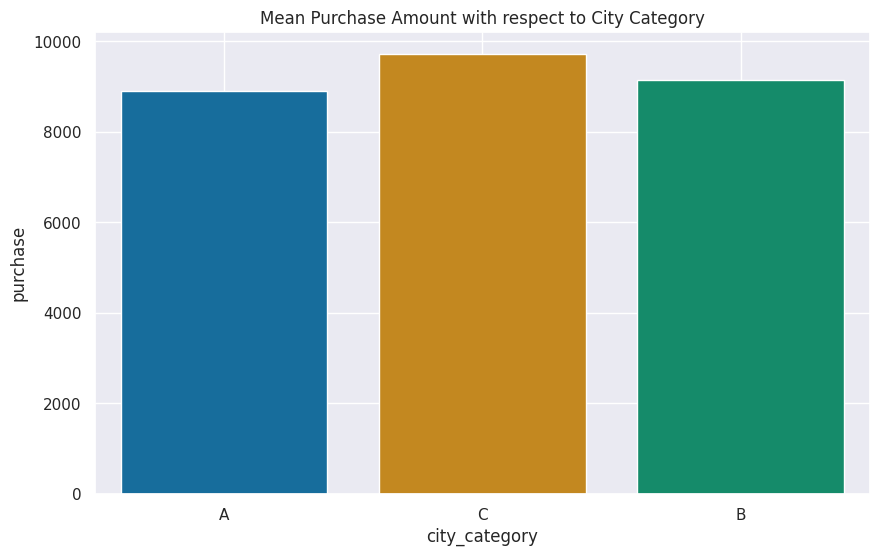

In [35]:
sns.barplot(x='city_category', y='purchase', data=new_df, ci=None)
plt.title("Mean Purchase Amount with respect to City Category")
plt.grid(1)
plt.show()

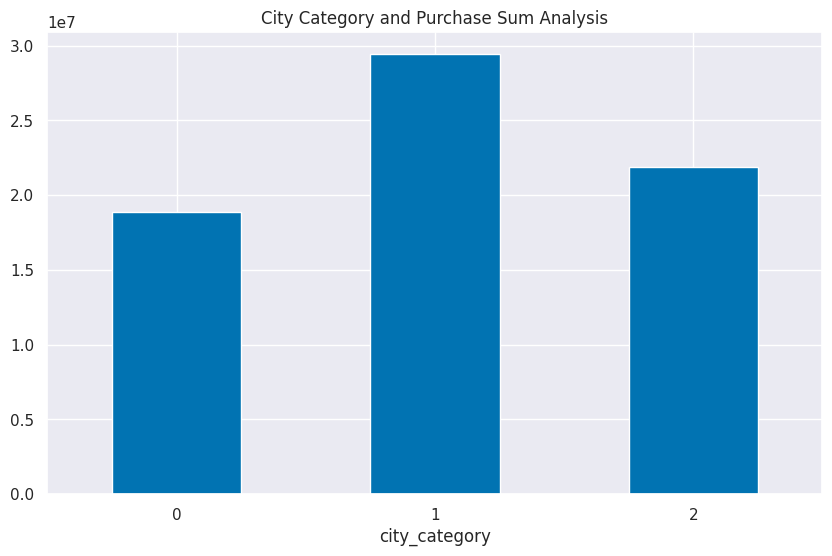

In [36]:
new_df2.groupby('city_category').sum()['purchase'].plot(kind='bar')
plt.title("City Category and Purchase Sum Analysis")
plt.xticks(rotation=0)
plt.show()

<Axes: title={'center': 'City Category'}, ylabel='purchase'>

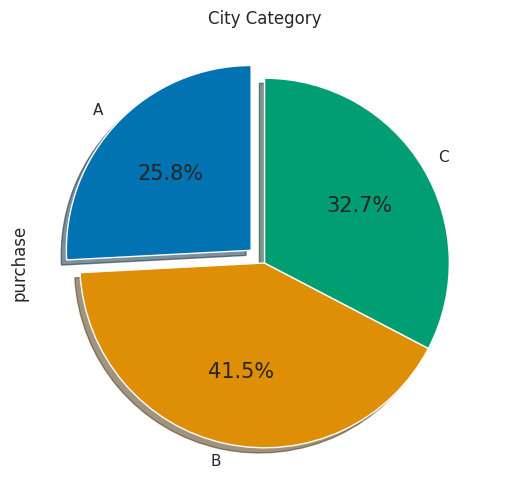

In [37]:
new_df.groupby("city_category")["purchase"].sum().plot.pie(title = "City Category", startangle = 90, explode = (0.1, 0, 0), autopct = "%1.1f%%", shadow = True)

occupation
0     69638
1     47426
2     26588
3     17650
4     72308
5     12177
6     20355
7     59133
8      1546
9      6291
10    12930
11    11586
12    31179
13     7728
14    27309
15    12165
16    25371
17    40043
18     6622
19     8461
20    33562
dtype: int64


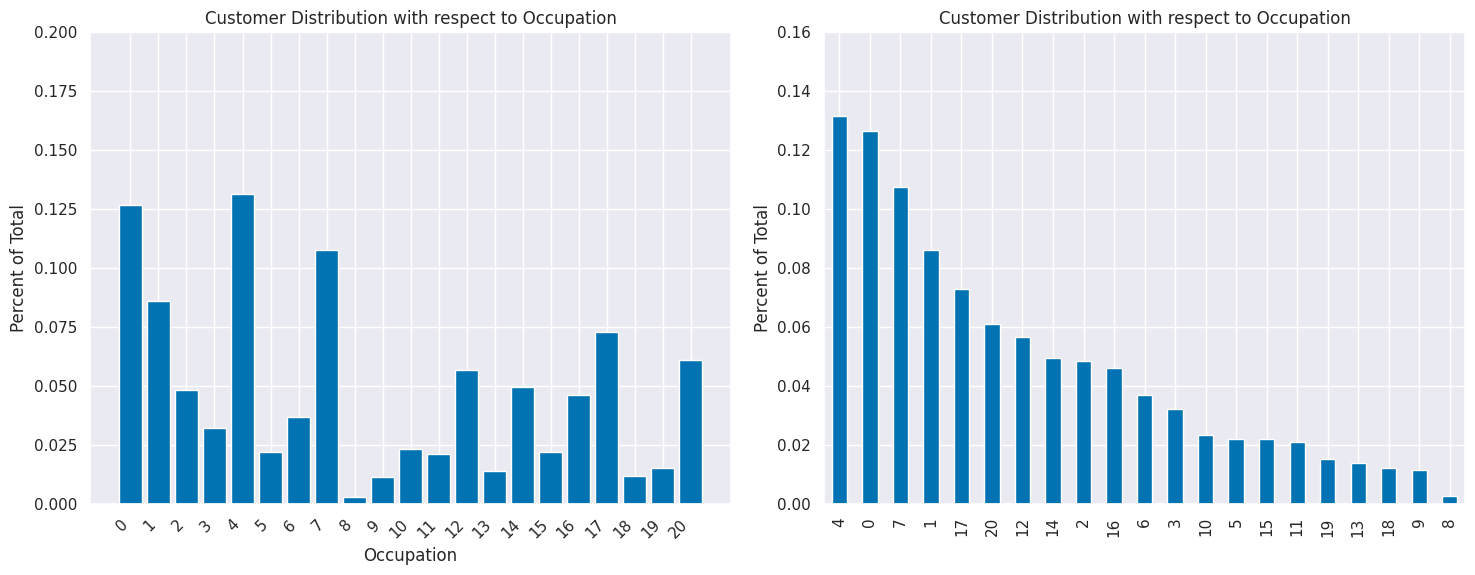

In [38]:
# to visualize the occupation with respect to the data
print(new_df.groupby('occupation').size())
occupation_percent = new_df['occupation'].value_counts(normalize=True).sort_index()

# Create a 1x2 subplot grid
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the first bar plot in the first subplot
occupation_labels = [str(occupation) for occupation in occupation_percent.index]
axes[0].set_xticks(occupation_percent.index)
axes[0].set_xticklabels(occupation_labels, rotation=45, ha='right')
axes[0].bar(occupation_percent.index, occupation_percent)
axes[0].set_title("Customer Distribution with respect to Occupation")
axes[0].set_xlabel("Occupation")
axes[0].set_ylabel("Percent of Total")
axes[0].set_ylim(0, 0.2)

ax = new_df['occupation'].value_counts(normalize=True).plot.bar(axes[1], title='Customer Distribution with respect to Occupation')
ax.set_ylabel("Percent of Total")
ax.set_ylim(0, 0.16)
# Show the plots
plt.tight_layout()
plt.show()

* Occupation 8 has extremely low count compared with the others; it can be ignored for the calculation since it won't affect much the result.

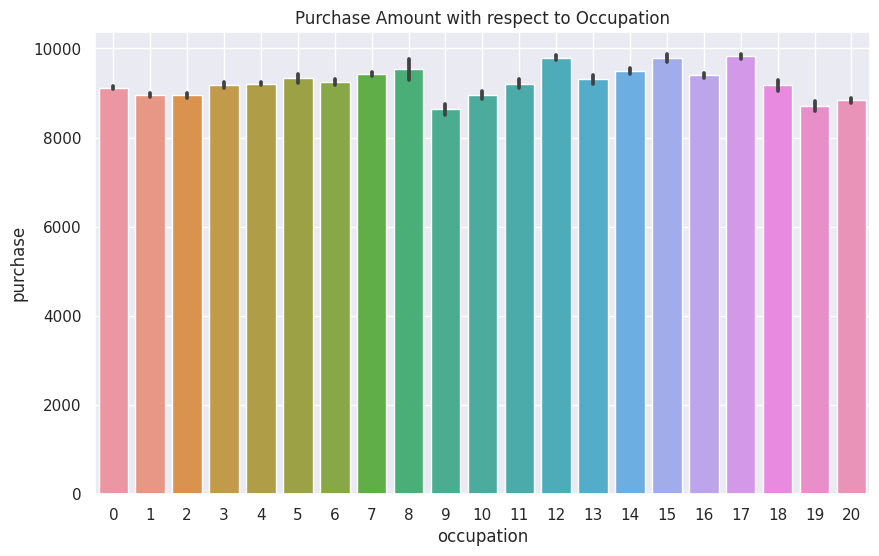

In [39]:
sns.barplot(x='occupation', y='purchase', data=new_df)
plt.title("Purchase Amount with respect to Occupation")
plt.grid(1)
plt.show()

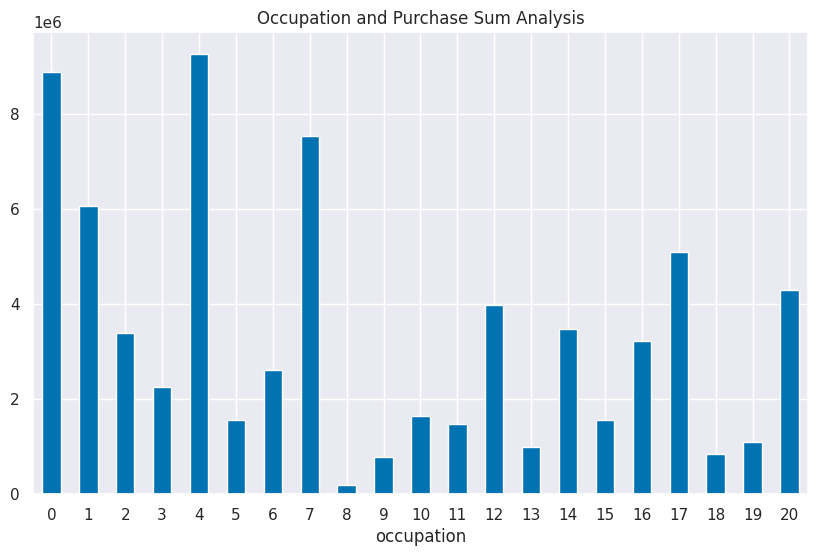

In [40]:
new_df2.groupby('occupation').sum()['purchase'].plot(kind='bar')
plt.title("Occupation and Purchase Sum Analysis")
plt.xticks(rotation=0)
plt.show()

0    324731
1    225337
Name: marital_status, dtype: int64


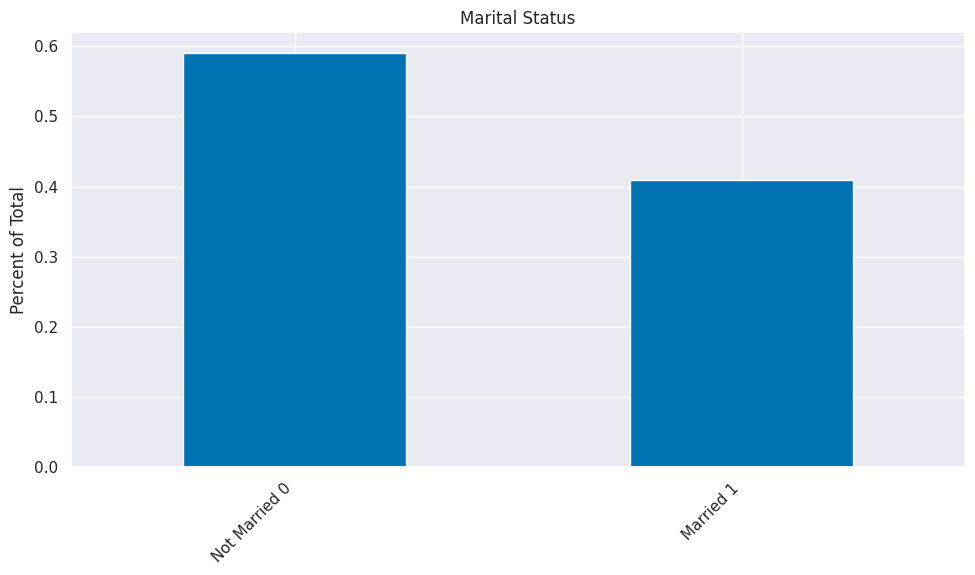

In [41]:
# to visualize the martial relatonship in the data
print(new_df["marital_status"].value_counts())
ax = new_df['marital_status'].value_counts(normalize=True).plot.bar(title='Marital Status')
plt.xticks([0, 1], ['Not Married 0', 'Married 1'], rotation=45, ha='right')
ax.set_ylabel("Percent of Total")
plt.tight_layout()
plt.show()

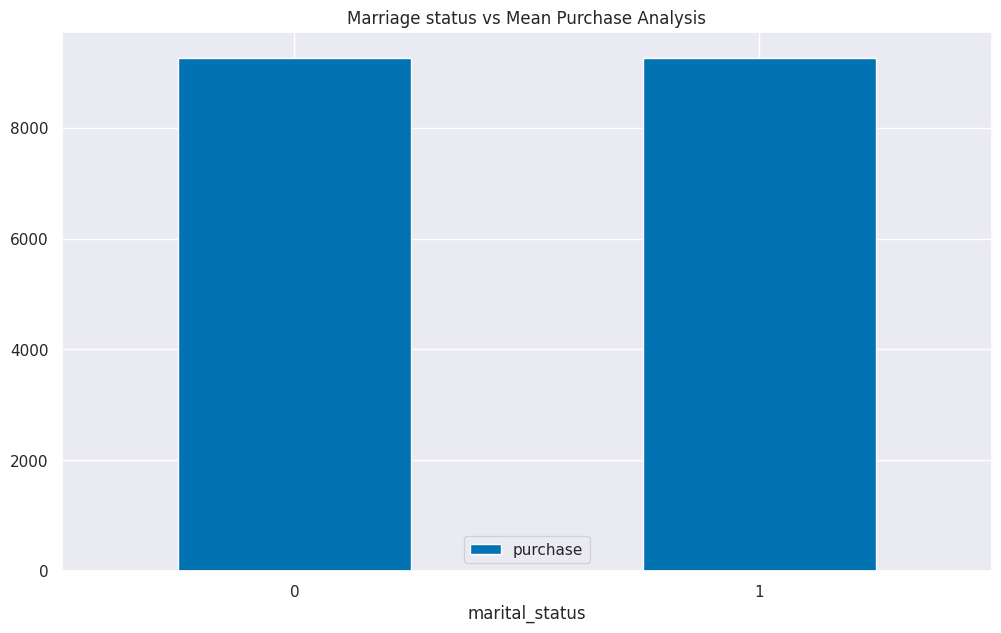

In [42]:
marr_ = new_df.pivot_table(index="marital_status", values="purchase", aggfunc=np.mean)
marr_.plot(kind='bar',figsize=(12,7))
plt.title("Marriage status vs Mean Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

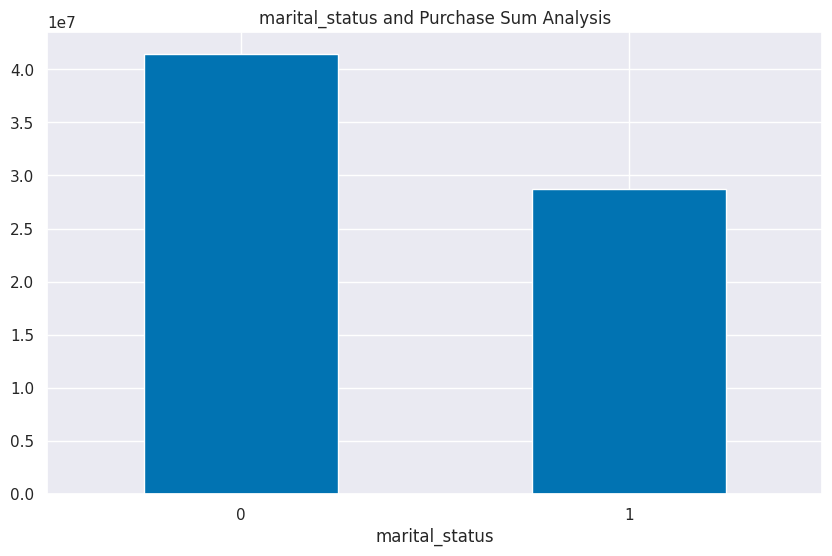

In [43]:
new_df2.groupby('marital_status').sum()['purchase'].plot(kind='bar')
plt.title("marital_status and Purchase Sum Analysis")
plt.xticks(rotation=0)
plt.show()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: product_category_1, dtype: int64


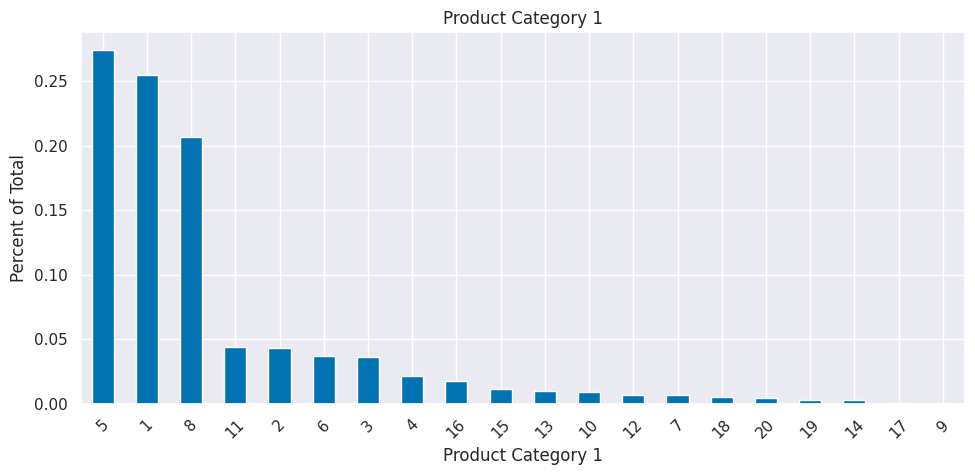

In [44]:
# to visualize the product category 1 data
plt.figure(figsize = (10, 5))
print(new_df["product_category_1"].value_counts())
ax = new_df['product_category_1'].value_counts(normalize=True).plot.bar(title='Product Category 1')
ax.set_xlabel("Product Category 1")
ax.set_ylabel("Percent of Total")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

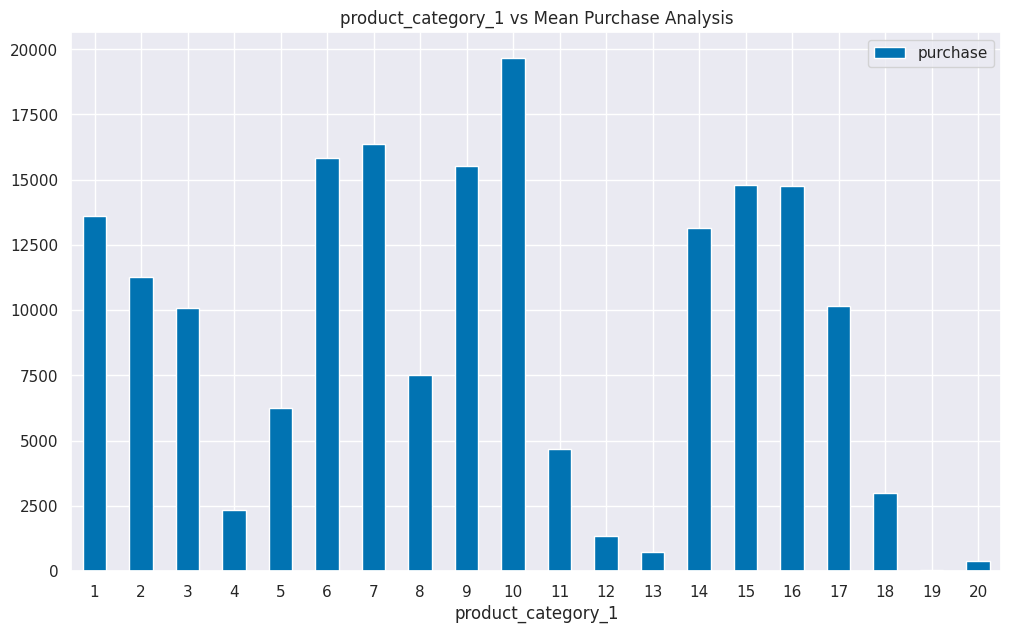

In [45]:
pro_ = new_df.pivot_table(index="product_category_1", values="purchase", aggfunc=np.mean)
pro_.plot(kind='bar',figsize=(12,7))
plt.title("product_category_1 vs Mean Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

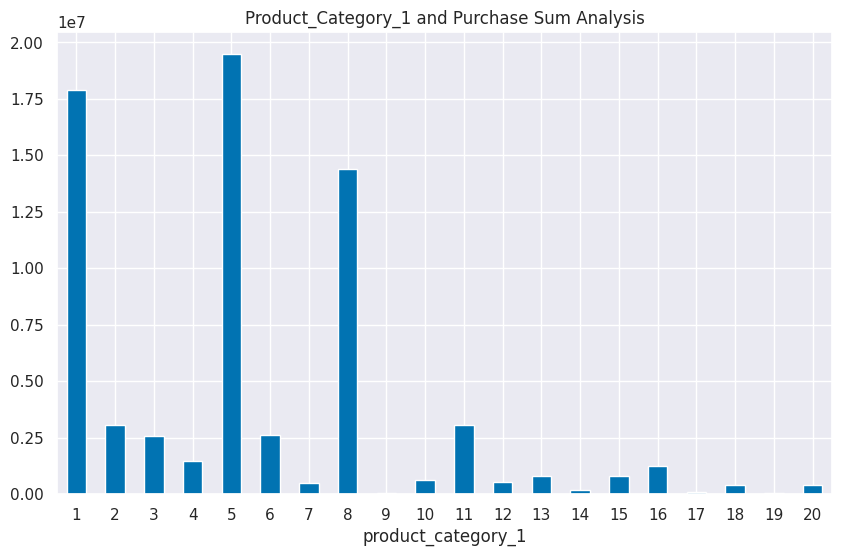

In [46]:
new_df2.groupby('product_category_1').sum()['purchase'].plot(kind='bar')
plt.title("Product_Category_1 and Purchase Sum Analysis")
plt.xticks(rotation=0)
plt.show()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: product_category_2, dtype: int64


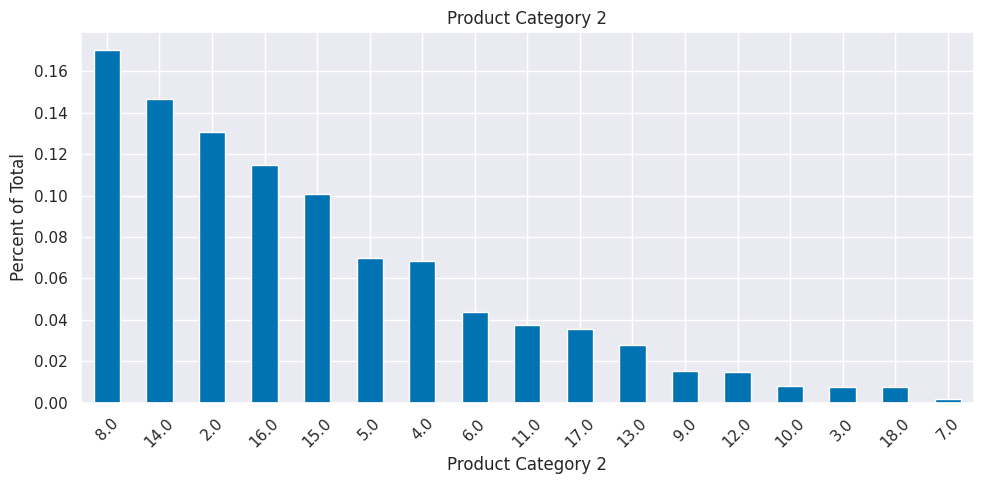

In [47]:
# to visualize the product category 2 data
plt.figure(figsize = (10, 5))
print(new_df["product_category_2"].value_counts())
ax = new_df['product_category_2'].value_counts(normalize=True).plot.bar(title='Product Category 2')
ax.set_xlabel("Product Category 2")
ax.set_ylabel("Percent of Total")
plt.xticks(rotation=45)
sns.set(style="whitegrid")
plt.tight_layout()
plt.show()

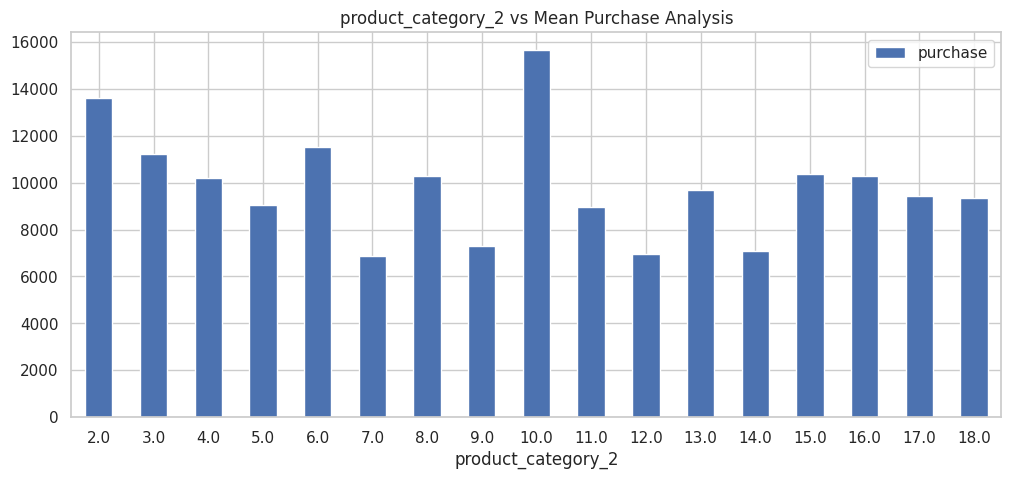

In [48]:
pro_ = new_df.pivot_table(index="product_category_2", values="purchase", aggfunc=np.mean)
pro_.plot(kind='bar',figsize=(12,5))
plt.title("product_category_2 vs Mean Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

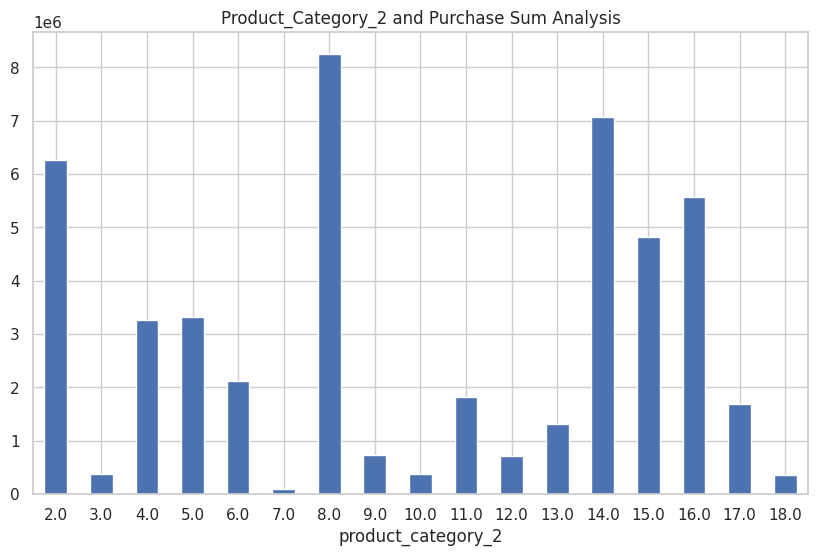

In [49]:
new_df2.groupby('product_category_2').sum()['purchase'].plot(kind='bar')
plt.title("Product_Category_2 and Purchase Sum Analysis")
plt.xticks(rotation=0)
plt.show()

16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: product_category_3, dtype: int64


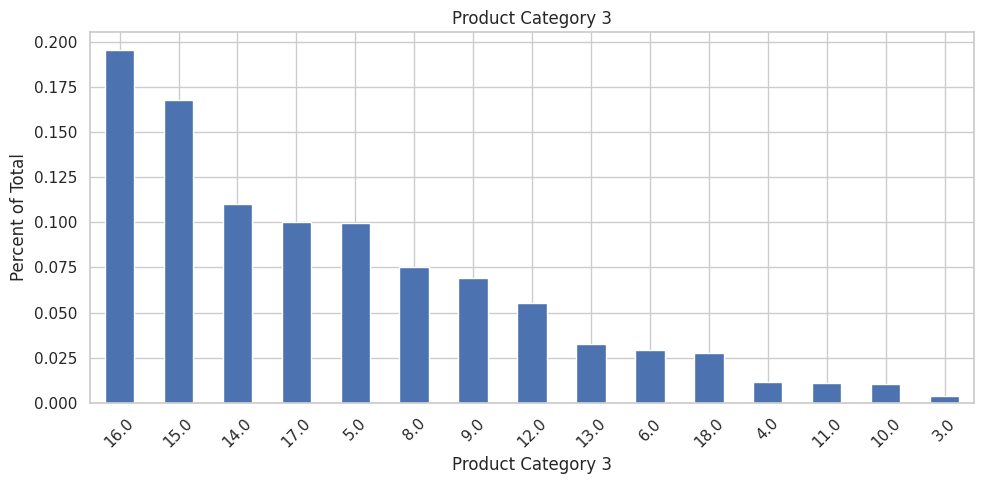

In [50]:
# to visualize the product category 3 data
plt.figure(figsize = (10, 5))
print(new_df["product_category_3"].value_counts())
ax = new_df['product_category_3'].value_counts(normalize=True).plot.bar(title='Product Category 3')
ax.set_xlabel("Product Category 3")
ax.set_ylabel("Percent of Total")
plt.xticks(rotation=45)
sns.set(style="whitegrid")
plt.tight_layout()
plt.show()

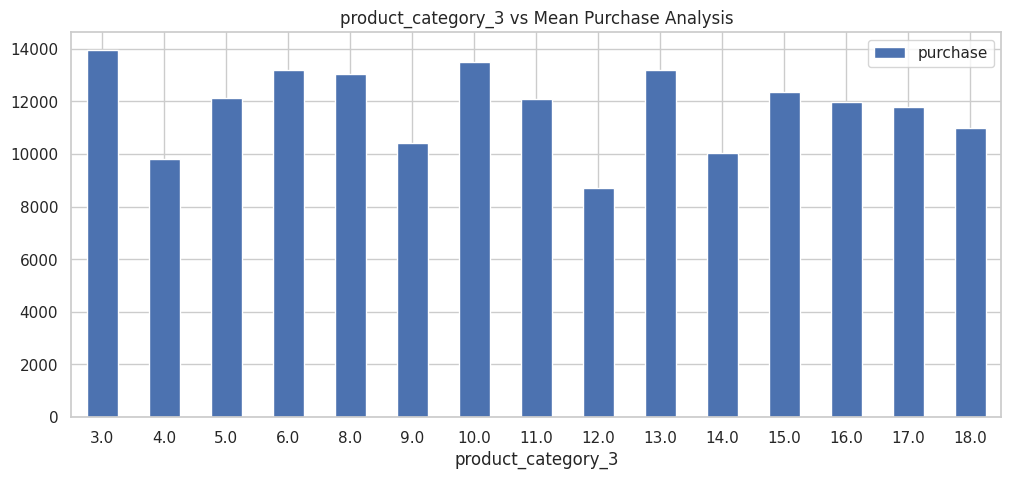

In [51]:
pro_ = new_df.pivot_table(index="product_category_3", values="purchase", aggfunc=np.mean)
pro_.plot(kind='bar',figsize=(12,5))
plt.title("product_category_3 vs Mean Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

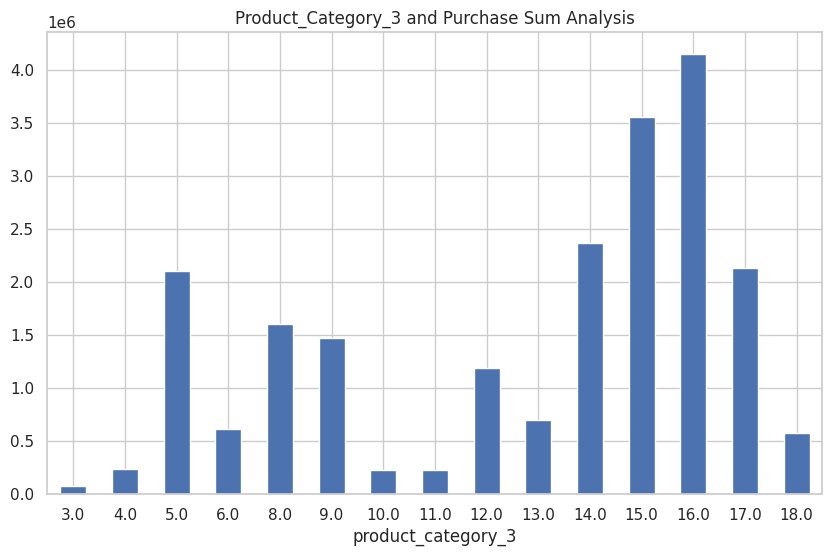

In [52]:
new_df2.groupby('product_category_3').sum()['purchase'].plot(kind='bar')
plt.title("Product_Category_3 and Purchase Sum Analysis")
plt.xticks(rotation=0)
plt.show()

### A basic observation is that:

* Product P00265242 is the most popular product.
* Most of the transactions were made by men.
* Age group with most transactions was 26-35.
* City Category with most transactions was B, indicating urban population.
* People living 1 y in city buy the most.
* Unmarried buy more.
* Occupation 4, 0, 7 are the ones that tend to buy most.
* Most loved product under Product_Category_1 is 5, 1 and 8.
* Most loved product under Product_Category_2 is 8.
* Most loved product under Product_Category_3 is 16 and 15.

### Bivariate Analysis

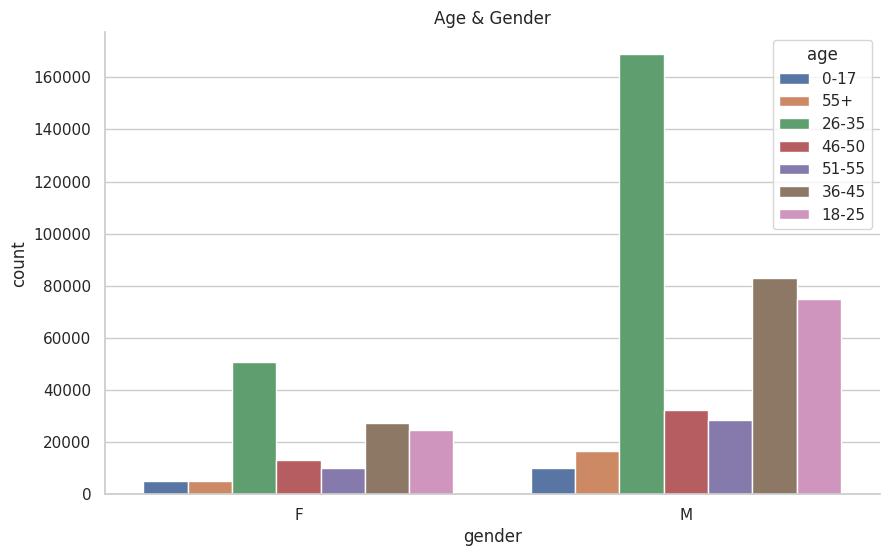

In [53]:
sns.countplot(x=new_df["gender"], hue = new_df["age"]).set_title("Age & Gender")
sns.despine()

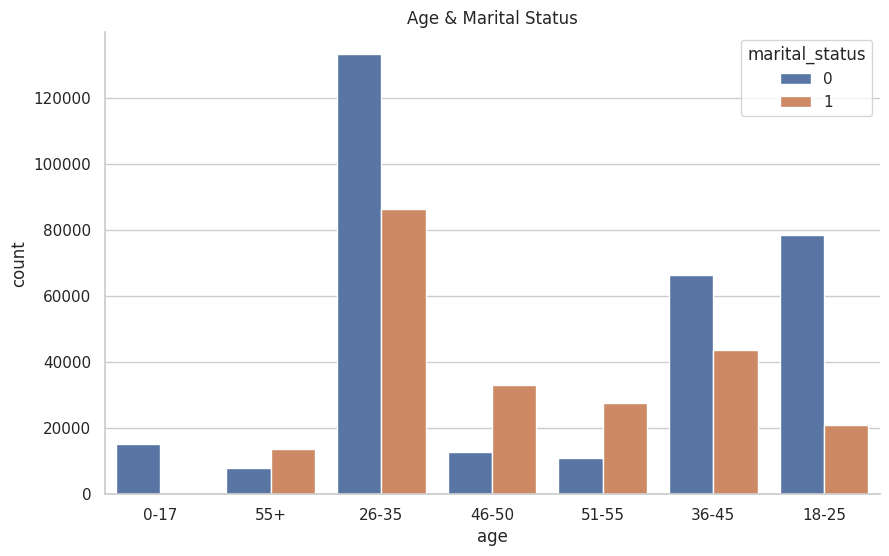

In [54]:
sns.countplot(x=new_df["age"], hue = new_df["marital_status"]).set_title("Age & Marital Status")
sns.despine()

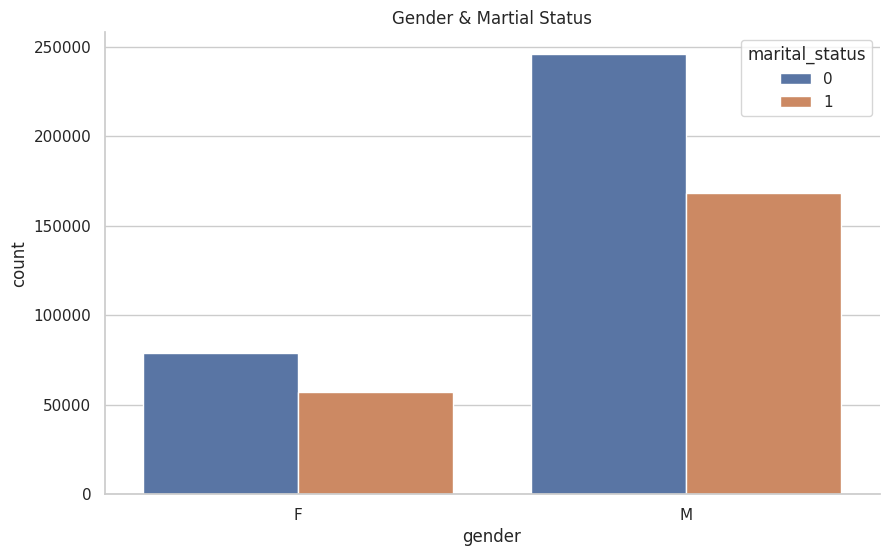

In [55]:
sns.countplot(x=new_df["gender"], hue = new_df["marital_status"]).set_title("Gender & Martial Status")
sns.despine()

<Axes: xlabel='city_category', ylabel='purchase'>

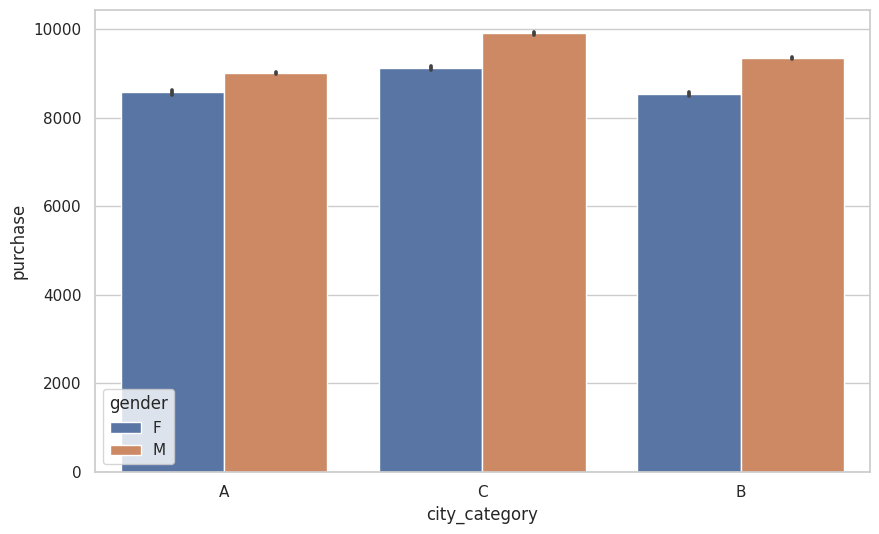

In [56]:
sns.barplot(x = 'city_category', y = 'purchase', hue = 'gender', data = new_df)

<Axes: xlabel='city_category', ylabel='purchase'>

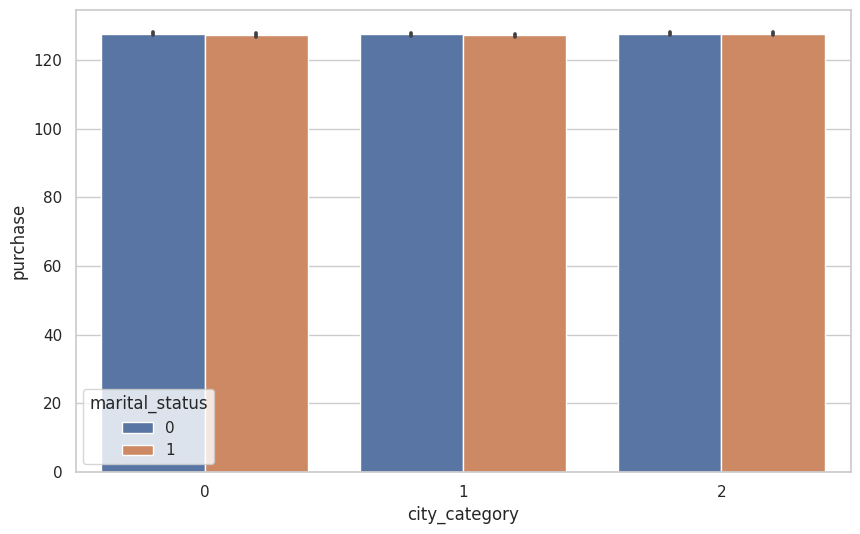

In [57]:
sns.barplot(x = 'city_category', y = 'purchase', hue = 'marital_status', data = new_df2)

<Axes: xlabel='occupation', ylabel='purchase'>

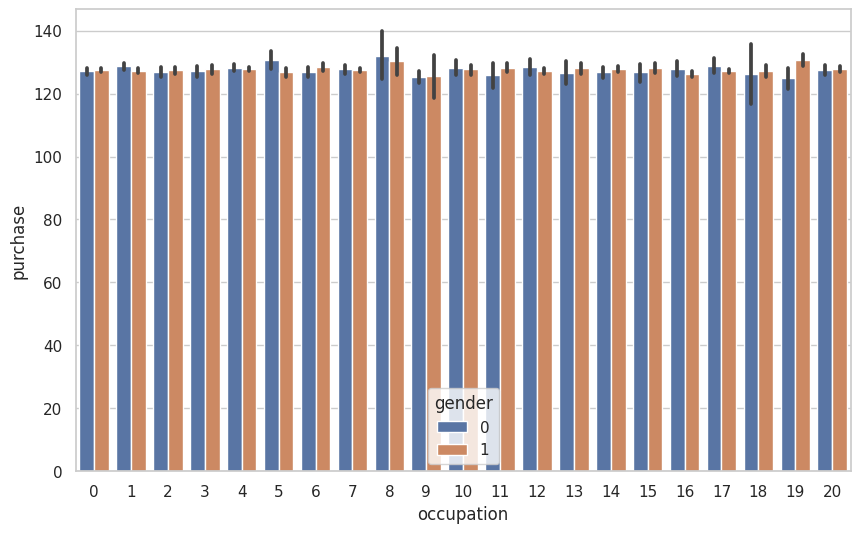

In [58]:
sns.barplot(x='occupation',y='purchase',hue='gender',data=new_df2)


## In this graph it can be seen that the female gender in the occupation 18 with higher purchases compared to others.

<Axes: xlabel='occupation', ylabel='purchase'>

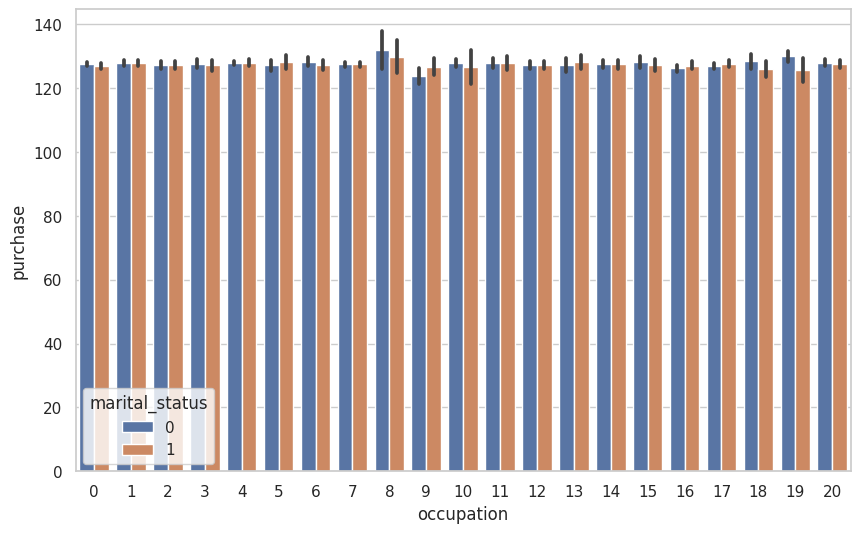

In [59]:
sns.barplot(x='occupation',y='purchase',hue='marital_status',data=new_df2)

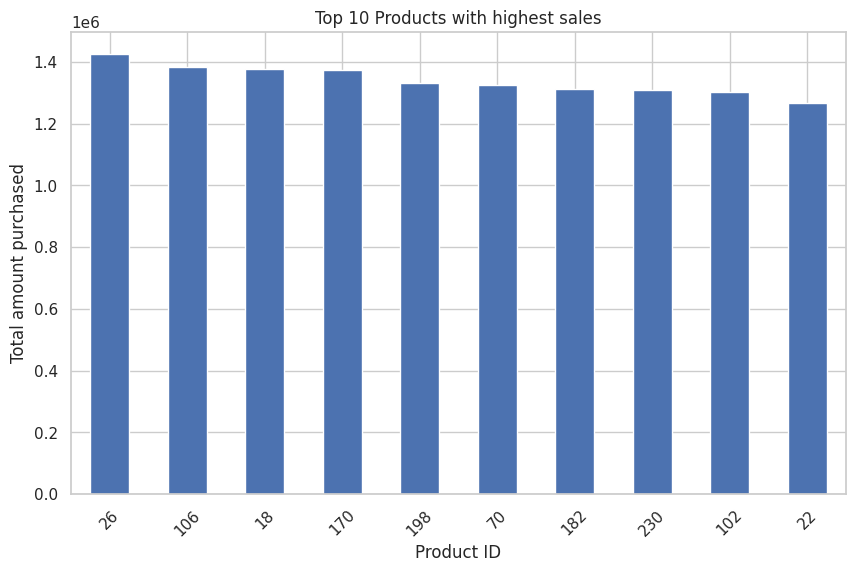

In [60]:
data = new_df2.groupby("product_id").sum()['purchase']

data.sort_values(ascending=False)[0:10].plot(kind='bar')
plt.xticks(rotation=90)
plt.xlabel('Product ID')
plt.ylabel('Total amount purchased')
plt.title('Top 10 Products with highest sales')
plt.xticks(rotation=45)
plt.show()

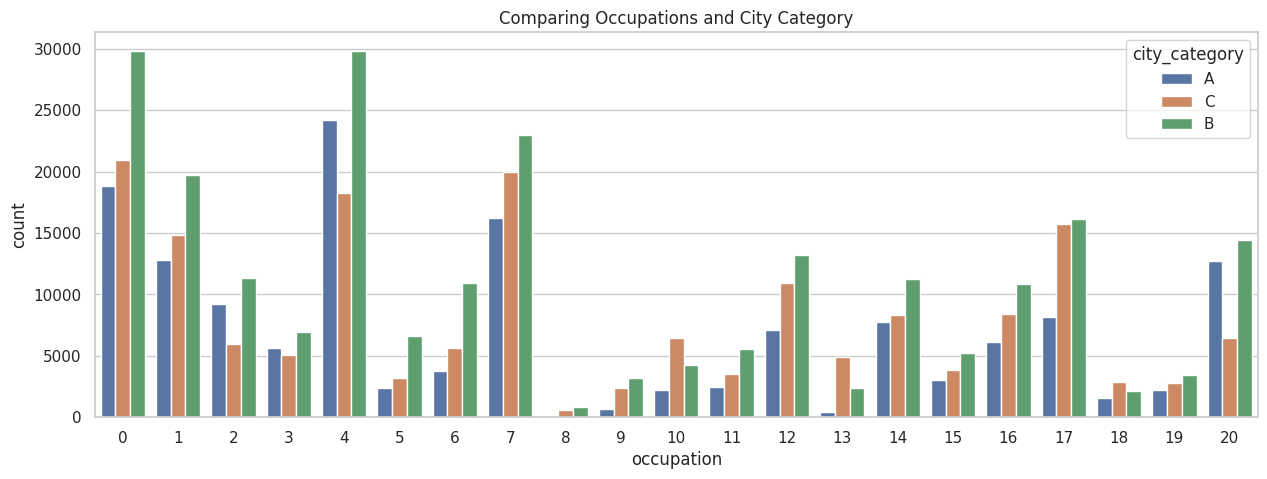

In [61]:
plt.figure(figsize=(15,5))
sns.countplot(x='occupation',data=new_df,hue='city_category')
plt.title('Comparing Occupations and City Category')
plt.show()

<Axes: xlabel='stay_in_current_city_years', ylabel='count'>

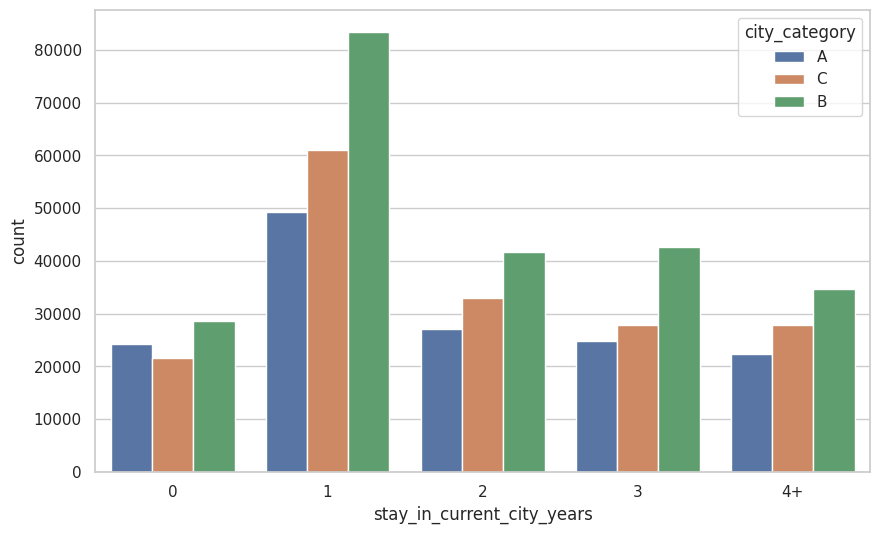

In [62]:
sns.countplot(x="stay_in_current_city_years",hue="city_category",order=["0","1","2","3","4+"],data=new_df)

## Multivariate Analysis

In [63]:
# plt.style.use('default')
# sns.pairplot(new_df)
# plt.show()

In [64]:
# plt.style.use('default')
# sns.pairplot(new_df2)
# plt.show()

<Axes: >

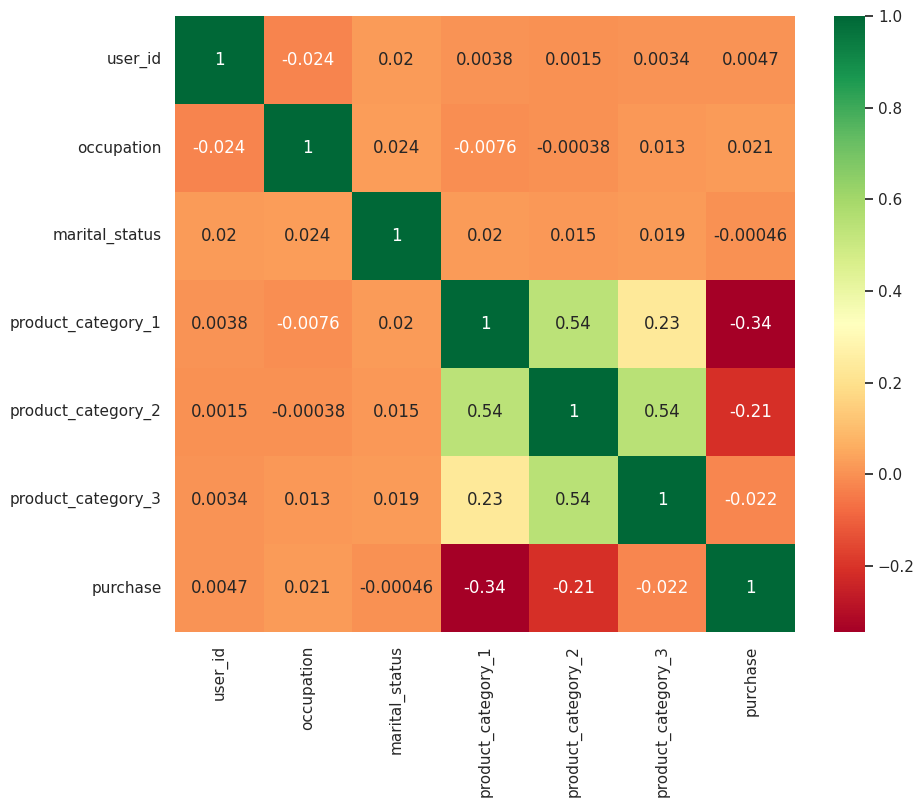

In [65]:
plt.figure(figsize=(10,8))
corr_matrix = new_df.corr(numeric_only=True)
sns.heatmap(corr_matrix, cmap='RdYlGn', annot = True)
# From the correlation heatmap, we can observe that the dependent feature 'Purchase' is highly correlated with 'Product_Category_1' and 'Product_Category_2'.

<Axes: >

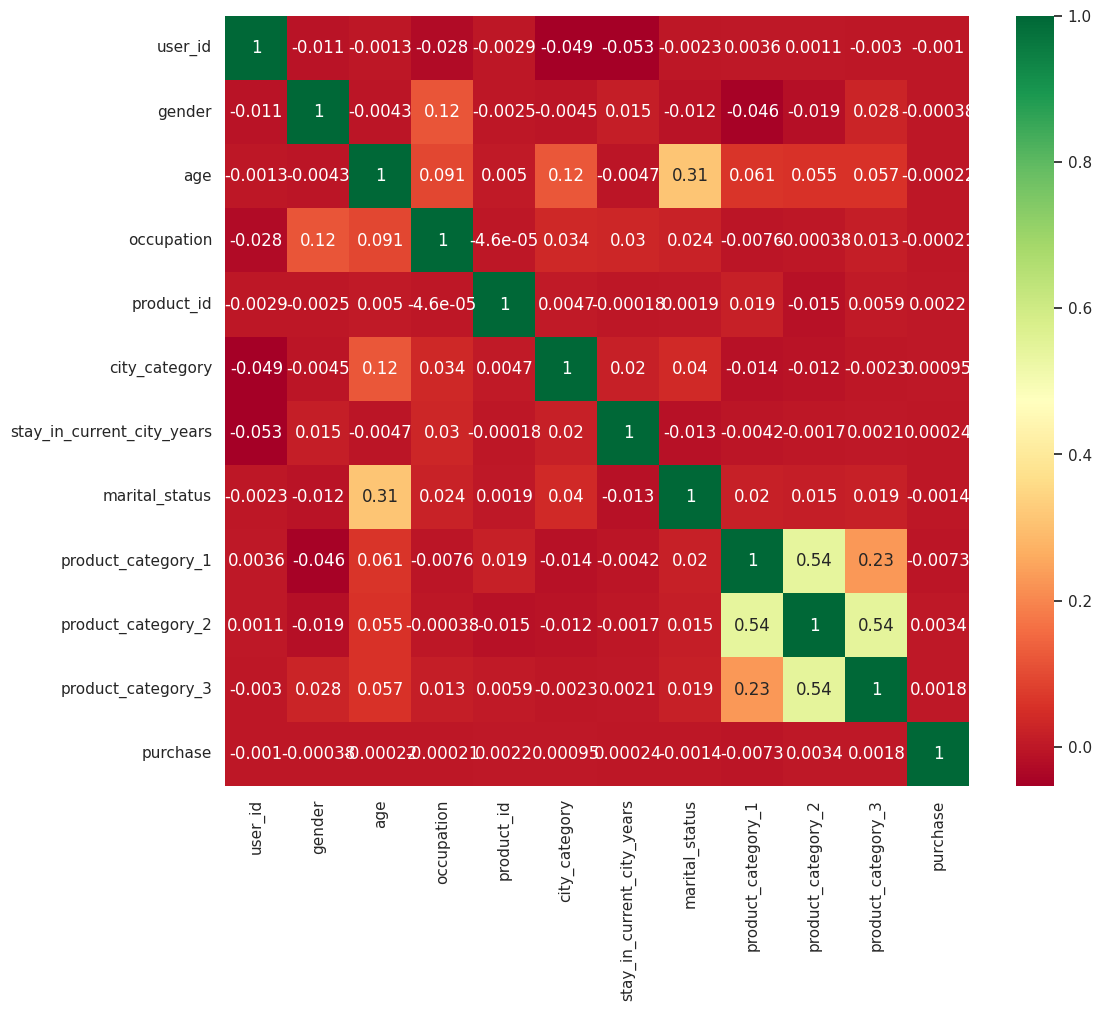

In [66]:
plt.figure(figsize=(12, 10))
corr_matrix = new_df2.corr(numeric_only=True)
sns.heatmap(corr_matrix, cmap='RdYlGn', annot = True)

### MISSING VALUES AND DATA CLEANING

user_id                        0.000000
gender                         0.000000
age                            0.000000
occupation                     0.000000
product_id                     0.000000
city_category                  0.000000
stay_in_current_city_years     0.000000
marital_status                 0.000000
product_category_1             0.000000
product_category_2            31.566643
product_category_3            69.672659
purchase                       0.000000
dtype: float64


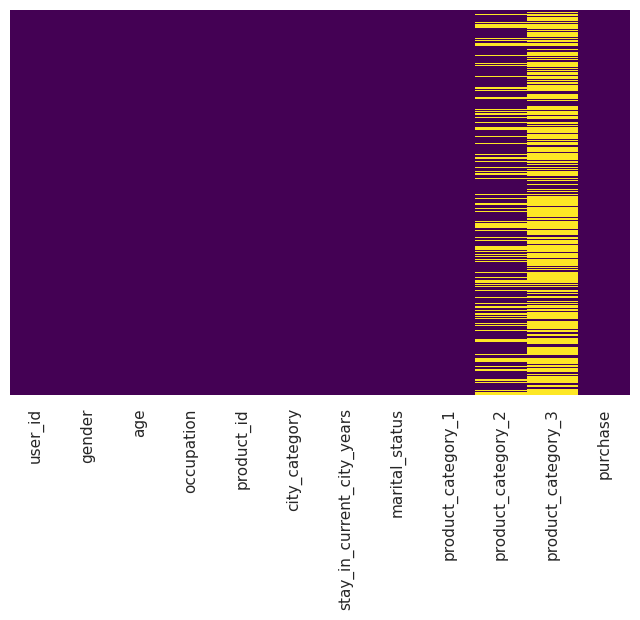

In [67]:
# to see missing value using visualisation
plt.figure(figsize=(8, 5))
sns.heatmap(new_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
percent_missing = new_df.isnull().sum()/new_df.shape[0]*100
print(percent_missing)

In [69]:
new_df1 = new_df.copy()

### Data Preprocessing

In [70]:
# from ydata_profiling import ProfileReport
# profile = ProfileReport(new_df, title="Profiling Report")
# profile.to_notebook_iframe()

In [71]:
# profile.to_file("report.html")

In [72]:
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   user_id                     550068 non-null  int64  
 1   gender                      550068 non-null  object 
 2   age                         550068 non-null  object 
 3   occupation                  550068 non-null  int64  
 4   product_id                  550068 non-null  object 
 5   city_category               550068 non-null  object 
 6   stay_in_current_city_years  550068 non-null  object 
 7   marital_status              550068 non-null  int64  
 8   product_category_1          550068 non-null  int64  
 9   product_category_2          376430 non-null  float64
 10  product_category_3          166821 non-null  float64
 11  purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 54.6+ MB


In [73]:
new_df1

,user_id,gender,age,occupation,product_id,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1000001,F,0-17,10,P00069042,A,2,0,3,NaN,NaN,8370
1,1000001,F,0-17,10,P00248942,A,2,0,1,6.0,14.0,15200
2,1000001,F,0-17,10,P00087842,A,2,0,12,NaN,NaN,1422
3,1000001,F,0-17,10,P00085442,A,2,0,12,14.0,NaN,1057
4,1000002,M,55+,16,P00285442,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,M,51-55,13,P00372445,B,1,1,20,NaN,NaN,368
550064,1006035,F,26-35,1,P00375436,C,3,0,20,NaN,NaN,371
550065,1006036,F,26-35,15,P00375436,B,4+,1,20,NaN,NaN,137
550066,1006038,F,55+,1,P00375436,C,2,0,20,NaN,NaN,365


In [74]:
def map_gender(df):
    df['gender'] = df['gender'].map({'F': 0, 'M': 1})

def map_age(df):
    age_mapping = {'0-17': 0, '18-25': 1, '26-35': 2, '36-45': 3, '46-50': 4, '51-55': 5, '55+': 6}
    df['age'] = df['age'].map(age_mapping)

def map_city_category(df):
    city_category_mapping = {'A': 0, 'B': 1, 'C': 2}
    df['city_category'] = df['city_category'].map(city_category_mapping)

def map_stay_in_current_city_years(df):
    stay_years_mapping = {'0': 0, '1': 1, '2': 2, '3': 3, '4+': 4}
    df['stay_in_current_city_years'] = df['stay_in_current_city_years'].map(stay_years_mapping)
def modify_user_id(df):
    df['user_id'] = df['user_id'] - 1000000
def modify_product_id(df):
    df['product_id'] = df['product_id'].str.replace('P00', '')
    df['product_id'] = pd.to_numeric(df['product_id'], errors='coerce')

# # Applying the mappings
map_gender(new_df1)
map_age(new_df1)
map_city_category(new_df1)
map_stay_in_current_city_years(new_df1)
modify_user_id(new_df1)
modify_product_id(new_df1)

new_df1

,user_id,gender,age,occupation,product_id,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1,0,0,10,69042,0,2,0,3,NaN,NaN,8370
1,1,0,0,10,248942,0,2,0,1,6.0,14.0,15200
2,1,0,0,10,87842,0,2,0,12,NaN,NaN,1422
3,1,0,0,10,85442,0,2,0,12,14.0,NaN,1057
4,2,1,6,16,285442,2,4,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,6033,1,5,13,372445,1,1,1,20,NaN,NaN,368
550064,6035,0,2,1,375436,2,3,0,20,NaN,NaN,371
550065,6036,0,2,15,375436,1,4,1,20,NaN,NaN,137
550066,6038,0,6,1,375436,2,2,0,20,NaN,NaN,365


In [75]:
new_df1.groupby('user_id')['purchase'].max().sort_values(ascending = False).head(10)

user_id
1474    23961
2272    23961
3160    23961
1577    23960
5596    23960
5848    23960
3045    23960
1387    23959
3947    23959
4117    23958
Name: purchase, dtype: int64

In [76]:
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   user_id                     550068 non-null  int64  
 1   gender                      550068 non-null  int64  
 2   age                         550068 non-null  int64  
 3   occupation                  550068 non-null  int64  
 4   product_id                  550068 non-null  int64  
 5   city_category               550068 non-null  int64  
 6   stay_in_current_city_years  550068 non-null  int64  
 7   marital_status              550068 non-null  int64  
 8   product_category_1          550068 non-null  int64  
 9   product_category_2          376430 non-null  float64
 10  product_category_3          166821 non-null  float64
 11  purchase                    550068 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 54.6 MB


### Feature Engineering

### method 1 - Random Imputation of values to missing data
* but as product category 2 has around >30 % missing data this here is useful
* but as product category 3 has around ~>70 % missing data this here is not very useful
* we can consider to drop the product category 3 column as it is not that important or we can impute -999 to all missing values to ensure that it dosen't affect our model

In [77]:
new_df1 = new_df1.drop('product_category_3', axis = 1)

In [78]:
mean_value=new_df1['product_category_2'].mean()

# Replacing NaNs in column with the mean of values of the same column
new_df1['product_category_2'].fillna(value = mean_value, inplace=True)

In [79]:
new_df1.isnull().sum()

user_id                       0
gender                        0
age                           0
occupation                    0
product_id                    0
city_category                 0
stay_in_current_city_years    0
marital_status                0
product_category_1            0
product_category_2            0
purchase                      0
dtype: int64

In [ ]:
#def random_imputation(df, cols):
    #for col in cols:
       # imputed_col_values = np.random.choice(df[~df[col].isna()][col].values, size = df[col].isna().sum())
        #col_null_indices = df[df[col].isna()].index
        #df.loc[col_null_indices, col] = imputed_col_values
    #return df


# Model Building

In [80]:
x = new_df1.drop(['purchase','user_id', 'product_id'], axis = 1)
y = new_df1['purchase']

In [2]:
print(x.shape)
print(y.shape)

NameError: name 'x' is not defined

## Test and Train data

In [82]:
#splitting test data = 30% and train data = 70%
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=0)

In [3]:
pip install pycaret


  Obtaining dependency information for pycaret from https://files.pythonhosted.org/packages/f5/4b/2002980b046ac396618dfc152d384b812a78182b776ca77fe0ae5f80deac/pycaret-3.0.4-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/10.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/10.3 MB ? eta -:--:--
     --------------------------------------- 0.1/10.3 MB 491.5 kB/s eta 0:00:21
     --------------------------------------- 0.1/10.3 MB 656.4 kB/s eta 0:00:16
      -------------------------------------- 0.2/10.3 MB 612.6 kB/s eta 0:00:17
      -------------------------------------- 0.2/10.3 MB 801.7 kB/s eta 0:00:13
     - ------------------------------------- 0.3/10.3 MB 791.9 kB/s eta 0:00:13
     - ------------------------------------- 0.4/10.3 MB 849.3 kB/s eta 0:00:12
     - ------------------------------------- 0.4/10.3 MB 798.7 kB/s eta 0:00:13
     -- ------------------------------------ 0.5/10.3 MB 973.5 kB/s eta 0:00:11
     -- --------

  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [370 lines of output]
      Ignoring numpy: markers 'python_version == "3.7" and (platform_machine != "arm64" or platform_system != "Darwin") and platform_machine != "aarch64"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.8" and (platform_machine != "arm64" or platform_system != "Darwin") and platform_machine != "aarch64"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.7" and platform_machine == "aarch64"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.8" and platform_machine == "aarch64"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.8" and platform_machine == "arm64" and platform_system == "Darwin"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.9" and platform_machine == "arm6


  Getting requirements to build wheel: still running...
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/4.7 MB ? eta -:--:--
     --- ------------------------------------ 0.4/4.7 MB 13.5 MB/s eta 0:00:01
     ------- -------------------------------- 0.9/4.7 MB 11.7 MB/s eta 0:00:01
     ---------- ----------------------------- 1.3/4.7 MB 10.0 MB/s eta 0:00:01
     -------------- ------------------------- 1.8/4.7 MB 10.2 MB/s eta 0:00:01
     ------------------ --------------------- 2.2/4.7 MB 10.2 MB/s eta 0:00:01
     --------------------- ------------------ 2.6/4.7 MB 9.7 MB/s eta 0:00:01
     ------------------------- -------------- 3.0/4.7 MB 9.7 MB/s eta 0:00:01
     ----------------------------- ---------- 3.5/4.7 MB 9.8 MB/s eta 0:00:01
     -------------------------------- ------- 3.9/4.7 MB 9.5 M

In [83]:
from pycaret.regression import *

In [84]:
s = setup(data = new_df1, target = 'purchase', session_id=123)

,Description,Value
0,Session id,123
1,Target,purchase
2,Target type,Regression
3,Original data shape,"(550068, 11)"
4,Transformed data shape,"(550068, 11)"
5,Transformed train set shape,"(385047, 11)"
6,Transformed test set shape,"(165021, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [ ]:
compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,14:46:36
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Regressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,2400.3802,10693534.2703,3270.0608,0.5762,0.4423,0.4091,1.3900
dt,Decision Tree Regressor,2642.5087,14218210.0694,3770.6521,0.4365,0.4845,0.3731,2.4120
lr,Linear Regression,3579.6362,21867998.3378,4676.3048,0.1333,0.6893,1.0543,0.4150
lasso,Lasso Regression,3579.5866,21867988.4531,4676.3037,0.1333,0.6893,1.0544,0.2110
ridge,Ridge Regression,3579.6361,21867998.3346,4676.3048,0.1333,0.6893,1.0543,0.2130
lar,Least Angle Regression,3579.6362,21867998.3378,4676.3048,0.1333,0.6893,1.0543,0.1220
llar,Lasso Least Angle Regression,3579.5866,21867988.4531,4676.3037,0.1333,0.6893,1.0544,0.1230
br,Bayesian Ridge,3579.6148,21867999.7464,4676.3050,0.1333,0.6893,1.0544,0.2680
en,Elastic Net,3586.9537,21914576.4962,4681.2819,0.1314,0.6912,1.0719,0.1980
omp,Orthogonal Matching Pursuit,4034.2989,24958063.9973,4995.7864,0.0108,0.7597,1.7967,0.1200


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
import math
def model_result(model,x_train, x_test, y_train, y_test):
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print('MSE:',math.sqrt(mean_squared_error(y_test,y_pred)))
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_pred, y_test))
  print('R^2',np.round(metrics.r2_score(y_pred, y_test),2))

### Linear Model

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model_result(model,x_train, x_test, y_train, y_test)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X,y)
# plt.figure(figsize = (14,5))
# features = pd.Series(model.feature_importances_, index = X.columns).sort_values()
# features.plot(kind = 'bar')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs = -1)
train(model, X,y)
# plt.figure(figsize = (14,7))
# features = pd.Series(model.feature_importances_, index = X.columns).sort_values()
# features.plot(kind = 'bar')

In [ ]:
# from sklearn.ensemble import ExtraTreesRegressor
# model = ExtraTreesRegressor(n_jobs = -1)
# train(model, X,y)
# plt.figure(figsize = (14,7))
# features = pd.Series(model.feature_importances_, index = X.columns).sort_values()
# features.plot(kind = 'bar')

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
alpha_values = [0.1, 1.0, 10.0]

grid_search = GridSearchCV(estimator = ridge, param_grid = {'alpha': alpha_values} ,scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X,y)

best_alpha = grid_search.best_params_['alpha']
print("Best alpha:", best_alpha)

In [ ]:
# model = Ridge(alpha = 10)
# train(model, X,y)

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso()
alpha_values = [0.1, 1.0, 10.0]

grid_search = GridSearchCV(estimator = lasso, param_grid = {'alpha': alpha_values} ,scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X,y)

best_alpha = grid_search.best_params_['alpha']
print("Best alpha:", best_alpha)

In [ ]:
# model = Lasso(alpha = 0.1)
# train(model, X, y)


In [ ]:
# new_df = new_df.fillna(method = 'pad')
# new_df = new_df.fillna(method = 'backfill')
# assert pd.notnull(new_df).all().all()
# new_df.isnull().sum()

In [ ]:
# def convert_feature_city(data):
#     if data == 'A':
#         return 2
#     elif data == 'B':
#         return 3
#     else:
#         return 4
# new_df['city_category'] = new_df['city_category'].apply(convert_feature_city)

In [ ]:
new_df.head()

In [ ]:
new_df.describe(include="object")

In [ ]:
print(new_df['gender'].value_counts())
print(new_df['gender'].value_counts(normalize=True))

## c. Data cleaning <br/>
* Identify and handle missing values, outliers, and inconsistent data. <br/>
* Implement appropriate techniques to clean the data, such as dropping or imputing missing
values, removing outliers, and addressing inconsistent entries.

In [ ]:
new_df[new_df.duplicated()].sum()

In [ ]:
for column_name in new_df.columns:
    unique_entries_count = new_df[column_name].nunique()
    print(f"Number of unique entries in '{column_name}': {unique_entries_count}")

In [ ]:
new_df.hist(figsize=(8,8))
plt.show()

In [ ]:
new_df['Purchase'].hist(bins=50,color='red')
plt.show()

In [ ]:
# sns.pairplot(new_df)

In [ ]:
corr_matrix = new_df.corr(numeric_only=True)
sns.heatmap(corr_matrix, cmap='RdYlGn', annot = True)

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(new_df["purchase"])

plt.subplot(122)
new_df["purchase"].plot.box(figsize = (16, 6))
plt.show()

In [ ]:
px.box(new_df,x='Product_Category_1')

In [ ]:
new_df.columns

In [ ]:
px.box(new_df,x='Product_Category_2')

In [ ]:
px.box(new_df,x='Product_Category_3')